<a href="https://colab.research.google.com/github/pachterlab/BBB/blob/master/notebooks/lung_atlas/mouse_lung_dropseq_SRR8426358_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bioinformatics for Benched Biologists

This Python notebook demonstrates an analysis of a single-cell RNA-seq dataset starting from the reads. It was designed for an online 1-2 hour [Zoom](https://www.zoom.us/) workshop, and runs in about 30 minutes on [Google Colab](https://colab.research.google.com/).

The data presented in this notebook is part of the single-cell RNA-seq produced from tissue extracted from the whole mouse lung, published by [Ilias Angelidis, Lukas M. Simon et al. 2019](https://www.nature.com/articles/s41467-019-08831-9). In the paper, Angelidis, Simon et al. generated single-cell suspensions from eight 3-month old mice and seven 24-month old mice. We work through an analysis of cells from one of the 24-month old mice. This data constitutes a total of 2,725 cells (out of the 14,813 analyzed by Angelidis, Simon et al.) and involves processing 109,256,158 reads. The reads analyzed in the notebook are stored under accession [SRX5234128](https://www.ncbi.nlm.nih.gov/sra?term=SRX5234128) in the [Sequence Read Archive](https://www.ncbi.nlm.nih.gov/sra/) (SRA).

The tutorial was designed by A. Sina Booeshaghi and Lior Pachter, and is based on material presented at a one-day workshop at Caltech on February 10th 2020 organized by A. Sina Booeshaghi, Fan Gao, Ingileif Hallgrímsdóttir, and Lior Pachter for the [Caltech Bioinformatics Resource Center](http://bioinformatics.caltech.edu/). The notebook is based on three notebooks presented at that workshop:

- The kallisto | bustools [Introduction to single-cell RNA-seq I](https://colab.research.google.com/github/pachterlab/kallistobustools/blob/master/notebooks/kb_1_minute_intro.ipynb#scrollTo=wtwMjIjjCMcD) notebook.
- The kallisto | bustools [Introduction to single-cell RNA-seq II](https://colab.research.google.com/github/pachterlab/kallistobustools/blob/master/notebooks/kb_standard.ipynb#scrollTo=ijU_u6uj3Sio) notebook.
- The Scanpy [Preprocessing and clustering 3k PBMCs](https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html) notebook.

The methods in this notebook are described in the following papers:

* Gerbrands, Jan J. "On the relationships between SVD, KLT and PCA." Pattern recognition 14, no. 1-6 (1981): 375-381.

* Goldberger, Jacob, Geoffrey E. Hinton, Sam T. Roweis, and Russ R. Salakhutdinov. "Neighbourhood components analysis." In Advances in neural information processing systems, pp. 513-520. 2005.

* Maaten, Laurens van der, and Geoffrey Hinton. "Visualizing data using t-SNE." Journal of machine learning research 9, no. Nov (2008): 2579-2605.

* Melsted, Páll, A. Sina Booeshaghi, Fan Gao, Eduardo da Veiga Beltrame, Lambda Lu, Kristján Eldjárn Hjorleifsson, Jase Gehring, and Lior Pachter. "Modular and efficient pre-processing of single-cell RNA-seq." BioRxiv (2019): 673285.

* Traag, Vincent A., Ludo Waltman, and Nees Jan van Eck. "From Louvain to Leiden: guaranteeing well-connected communities." Scientific reports 9, no. 1 (2019): 1-12.

* Wolf, F. Alexander, Philipp Angerer, and Fabian J. Theis. "SCANPY: large-scale single-cell gene expression data analysis." Genome biology 19, no. 1 (2018): 15.

First time Python users may want to complete Justin Bois' [Introduction to programming for the biological sciences Bootcamp](http://justinbois.github.io/bootcamp/2019/index.html). The bootcamp is taught to biologists at Caltech every year, but materials are freely available online and lessons / exercises can be worked through independent of instruction (ideally in order) . 

## Code of conduct

We ask that contributors to the project and participants in workshops based on project read and abide by our [code of conduct](https://github.com/pachterlab/BBB/blob/master/CODE_OF_CONDUCT.md).

## Google Colab

This notebook is a [Python Jupyter](https://jupyter.org/) notebook, and you will be running it on [Google Colab](https://colab.research.google.com/). Google Colab is a free Google cloud service that allows anyone with a Google account to launch a free computer in the cloud on which they can run an R or Python notebook. The computer served by Google is modest in resources, but as we will see sufficiently powerful for processing and analyzing single-cell RNA-seq datasets. Google provides an [introductory notebook](https://colab.research.google.com/notebooks/intro.ipynb) on Google Colab that is a good starting point for familiarizing oneself with the infrastructure.

To run this notebook select `Run all` in the `Runtime` drop down menu. Then authorize the notebook with `Run anyway`.

## Open source

To the extent possible, this tutorial relies on open source and freely available methods and software: 

- The data to be analyzed was generated using Drop-seq, which is an open source do-it-yourself single-cell RNA-seq technology: 

  - Macosko, Evan Z., Anindita Basu, Rahul Satija, James Nemesh, Karthik Shekhar, Melissa Goldman, Itay Tirosh et al. "[Highly parallel genome-wide expression profiling of individual cells using nanoliter droplets](https://www.sciencedirect.com/science/article/pii/S0092867415005498)." Cell 161, no. 5 (2015): 1202-1214.

- The article describing the data is open-access: 

  - Angelidis, Ilias, Lukas M. Simon, Isis E. Fernandez, Maximilian Strunz, Christoph H. Mayr, Flavia R. Greiffo, George Tsitsiridis et al. "[An atlas of the aging lung mapped by single cell transcriptomics and deep tissue proteomics](https://www.nature.com/articles/s41467-019-08831-9)." Nature communications 10, no. 1 (2019): 1-17

- The raw reads are freely available for download:

  - [European Nucleotide Archive ftp site](ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR842/008/SRR8426358)

- The software used for analysis is all open source and freely available.

- The Google Colaboratory code is open source:

  - [Google Colab Github repository](https://github.com/googlecolab)

## Setup

In [0]:
# This is  used to time the running of this notebook
import time
start_time = time.time()

### Install python packages

In [2]:
%%time
# These packages are pre-installed on Google Colab, but are included here to simplify running this notebook locally
!pip install matplotlib
!pip install scikit-learn
!pip install numpy
!pip install scipy
!pip install leidenalg
!pip install scanpy

     |████████████████████████████████| 102kB 4.3MB/s 
     |████████████████████████████████| 3.2MB 13.2MB/s 
  Created wheel for leidenalg: filename=leidenalg-0.7.0-cp36-cp36m-linux_x86_64.whl size=1110225 sha256=d3d2baefa664521ddfd6d67c524829121230bd90b20f7deb4c638b80b4253725
  Stored in directory: /root/.cache/pip/wheels/29/55/48/5a04693a10f50297bcda23819ca23ab3470a61dd911851c8bd
Successfully built leidenalg
     |████████████████████████████████| 7.2MB 4.0MB/s 
     |████████████████████████████████| 102kB 13.7MB/s 
     |████████████████████████████████| 2.9MB 56.7MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 1.15.0 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
  Found existing installation: h5py 2.8.0
    Uninstalling h5py-2.8.0:
      Successfully uninst

### Install kb-python

In [3]:
%%time
# Install kb. This package runs kallisto and bustools. These are programs used to process the single-cell RNA-seq reads to produce count matrices.
!pip install kb-python 

     |████████████████████████████████| 35.4MB 96kB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
  Created wheel for loompy: filename=loompy-3.0.6-cp36-none-any.whl size=47895 sha256=8a39acbd9e36300dd317c982593d74eb963478afbdff8ae814dd2509f9b620e3
  Stored in directory: /root/.cache/pip/wheels/f9/a4/90/5a98ad83419732b0fba533b81a2a52ba3dbe230a936ca4cdc9
  Created wheel for numpy-groupies: filename=numpy_groupies-0+unknown-cp36-none-any.whl size=28042 sha256=32b871aab5a44c3d5b3a220fd834e3edf2d5d23b7ed570fe3e6cce885ce4c236
  Stored in directory: /root/.cache/pip/wheels/30/ac/83/64d5f9293aeaec63f9539142fc629a41af064cae1b3d8d94aa
Successfully built loompy numpy-groupies
CPU times: user 232 ms, sys: 40.2 ms, total: 273 ms
Wall time: 10.8 s


### Download the data

In [4]:
%%time
# Download the data from the ENA https://www.ebi.ac.uk/ena/browser/view/SRR8426358
# !wget --continue ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR842/008/SRR8426358/SRR8426358_1.fastq.gz
# !wget --continue ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR842/008/SRR8426358/SRR8426358_2.fastq.gz


CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.63 µs


### Download a kallisto index

This data consists of cells from a mouse lung, so we download the mouse index (GRCm38.98 from [Ensembl](https://uswest.ensembl.org/index.html)).

In [5]:
!kb ref -d mouse -i index.idx -g t2g.txt -f1 transcriptome.fasta

[2020-03-26 06:58:19,125]    INFO Downloading files for mouse from https://caltech.box.com/shared/static/vcaz6cujop0xuapdmz0pplp3aoqc41si.gz to tmp/vcaz6cujop0xuapdmz0pplp3aoqc41si.gz
[2020-03-26 06:59:38,632]    INFO Extracting files from tmp/vcaz6cujop0xuapdmz0pplp3aoqc41si.gz


## Pseudoalignment and counting

The data we will process was produced with Drop-seq. The structure of Drop-seq data is described [here](https://teichlab.github.io/scg_lib_structs/methods_html/Drop-seq.html).

For more background on Drop-seq and a brief introduction to single-cell RNA-seq technology, we recommend working through our [Introduction to single-cell RNA-seq](https://colab.research.google.com/github/pachterlab/kallistobustools/blob/master/notebooks/Introduction_single_cell_RNA_seq.ipynb) Google Colab notebook.


### Run kallisto and bustools

In [0]:
# This command processes previously downloaded data
# %%time
# !kb count --h5ad -i index.idx -g t2g.txt -x Dropseq -o output --filter bustools -t 2 \
# SRR8426358_1.fastq.gz \
# SRR8426358_2.fastq.gz

In [7]:
# This comamnd streams data
%%time
!kb count --h5ad -i index.idx -g t2g.txt -x Dropseq -o output --filter bustools -t 2 \
ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR842/008/SRR8426358/SRR8426358_1.fastq.gz \
ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR842/008/SRR8426358/SRR8426358_2.fastq.gz

[2020-03-26 07:00:13,086]    INFO Piping ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR842/008/SRR8426358/SRR8426358_1.fastq.gz to tmp/SRR8426358_1.fastq.gz
[2020-03-26 07:00:13,088]    INFO Piping ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR842/008/SRR8426358/SRR8426358_2.fastq.gz to tmp/SRR8426358_2.fastq.gz
[2020-03-26 07:00:13,088]    INFO Generating BUS file from
[2020-03-26 07:00:13,088]    INFO         tmp/SRR8426358_1.fastq.gz
[2020-03-26 07:00:13,090]    INFO         tmp/SRR8426358_2.fastq.gz
[2020-03-26 07:23:12,545]    INFO Sorting BUS file output/output.bus to tmp/output.s.bus
[2020-03-26 07:23:37,703]    INFO Whitelist not provided
[2020-03-26 07:23:37,703]    INFO Generating whitelist output/whitelist.txt from BUS file tmp/output.s.bus
[2020-03-26 07:23:37,817]    INFO Inspecting BUS file tmp/output.s.bus
[2020-03-26 07:23:40,453]    INFO Correcting BUS records in tmp/output.s.bus to tmp/output.s.c.bus with whitelist output/whitelist.txt
[2020-03-26 07:23:41,276]    INFO Sorting BUS fi

## Basic QC

In [0]:
# Setup

import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import scanpy as sc
from scipy import stats

from collections import OrderedDict
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from matplotlib import cm
from matplotlib.lines import Line2D

def nd(arr):
    return np.asarray(arr).reshape(-1)
def yex(ax):
    lims = [np.min([ax.get_xlim(), ax.get_ylim()]),
            np.max([ax.get_xlim(), ax.get_ylim()])]

    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    return ax

def trim_axs(axs, N):
    """little helper to massage the axs list to have correct length..."""
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

import warnings
warnings.filterwarnings('ignore')

fsize=20

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

In [0]:
# load the unfiltered matrix
adata = anndata.read_h5ad("output/counts_unfiltered/adata.h5ad")
adata.var["gene_id"] = adata.var.index.values

t2g = pd.read_csv("t2g.txt", header=None, names=["tid", "gene_id", "gene_name"], sep="\t")
t2g.index = t2g.gene_id
t2g = t2g.loc[~t2g.index.duplicated(keep='first')]

adata.var["gene_name"] = adata.var.gene_id.map(t2g["gene_name"])
adata.var.index = adata.var["gene_name"]

In [10]:
adata

AnnData object with n_obs × n_vars = 3362 × 55421 
    var: 'gene_id', 'gene_name'

## Populate the anndata object

In [0]:
# Important constants we will use throughout the notebook

num_TSNE = 2
state = 42
metric = "euclidean"
n_neighbors = 30
num_PCA = 50
num_NCA = 10

# Filtering criteria
cell_threshold = 100
gene_threshold = 3

mito_criteria = 30

n_top_genes = 5000

n_bins = 20

flavor="seurat"

In [0]:
adata.obs["cell_counts"] = adata.X.sum(axis=1)
adata.var["gene_counts"] = nd(adata.X.sum(axis=0))

adata.obs["n_genes"] = nd((adata.X>0).sum(axis=1))
adata.var["n_cells"] = nd((adata.X>0).sum(axis=0))

mito_genes = adata.var_names.str.startswith('mt-')
adata.obs["percent_mito"] = adata[:,mito_genes].X.sum(axis=1)/adata.X.sum(axis=1)*100

## Anndata features

### Examine the knee plot

The "knee plot" was introduced in the Drop-seq paper: 
- Macosko et al., [Highly parallel genome-wide expression profiling of individual cells using nanoliter droplets](https://www.cell.com/fulltext/S0092-8674(15)00549-8), 2015. DOI:10.1016/j.cell.2015.05.002

In this plot cells are ordered by the number of UMI counts associated to them (shown on the *x*-axis), and the fraction of droplets with at least that number of cells is shown on the *y*-axis:

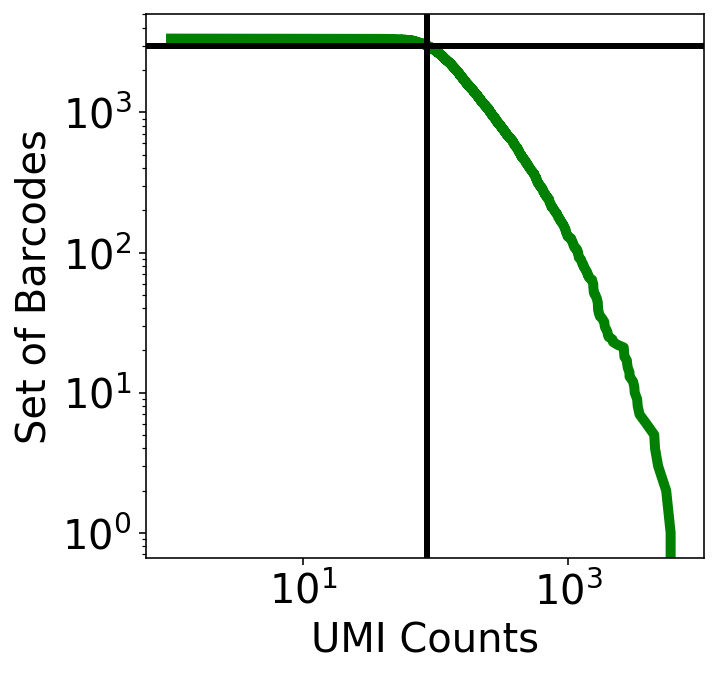

In [13]:
#@title Threshold cells according to knee plot { run: "auto", vertical-output: true }
expected_num_cells = 3000#@param {type:"integer"}
knee = np.sort(nd(adata.X.sum(axis=1)))[::-1]

fig, ax = plt.subplots(figsize=(5, 5))

x = knee
y = range(len(knee))

ax.loglog(x, y, linewidth=5, color="g")

ax.axvline(x=knee[expected_num_cells], linewidth=3, color="k")
ax.axhline(y=expected_num_cells, linewidth=3, color="k")

ax.set_xlabel("UMI Counts")
ax.set_ylabel("Set of Barcodes")

plt.show()

#### Exercise

The "knee plot" is sometimes shown with the UMI counts on the y-axis instead of the x-axis, i.e. flipped and rotated 90 degrees. Make the flipped and rotated plot. Is there a reason to prefer one orientation over the other? See our [Rotating the knee (plot) and related yoga](https://liorpachter.wordpress.com/2019/06/24/rotating-the-knee-plot-and-related-yoga/) blog post for more on this.

### Library saturation

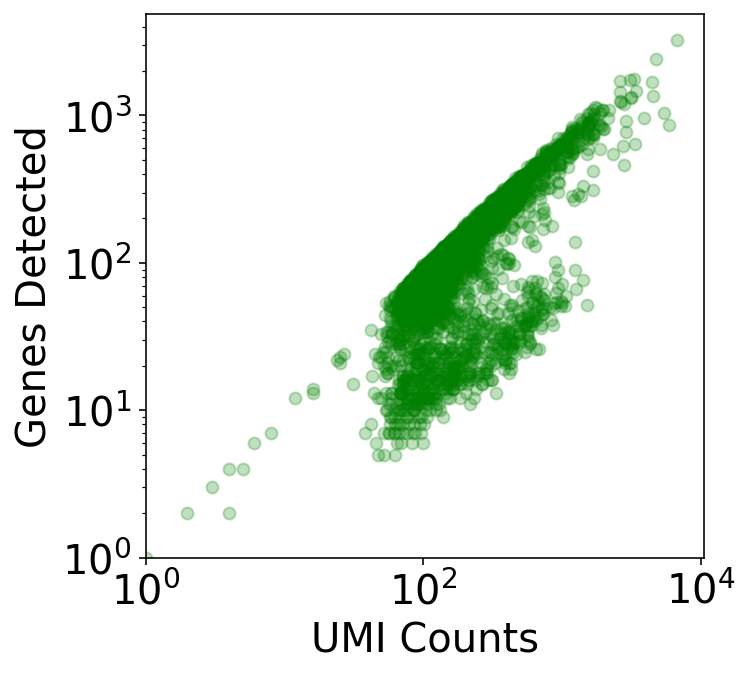

In [14]:
# Create a plot showing genes detected as a function of UMI counts.
fig, ax = plt.subplots(figsize=(5, 5))

x = nd(adata.X.sum(axis=1))
y = nd(np.sum(adata.X>0, axis=1))

ax.scatter(x, y, color="green", alpha=0.25)

ax.set_xlabel("UMI Counts")
ax.set_ylabel("Genes Detected")
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1)
ax.set_ylim(1)

plt.show()

This plot is misleading, as even the small alpha can't accurately show how many points are stacked at one location (This takes about a minute to run since there are a lot of points)

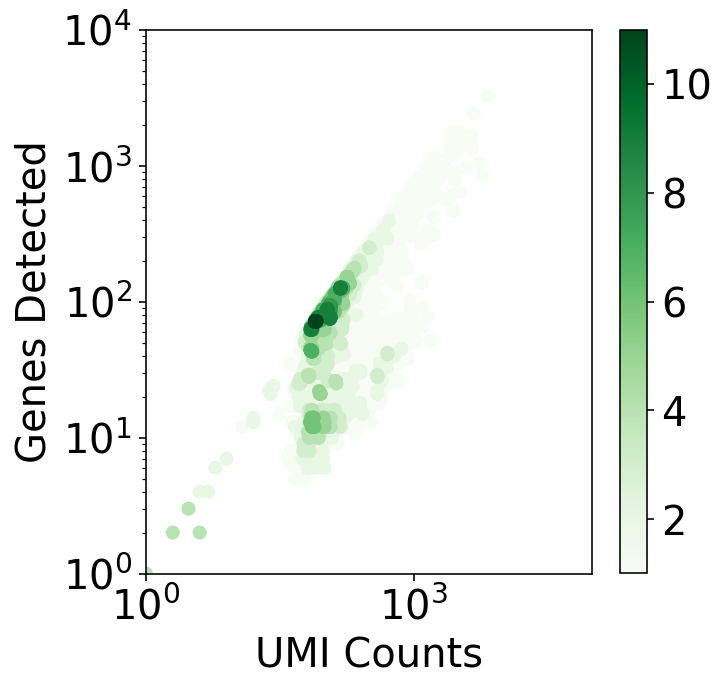

In [15]:
fig, ax = plt.subplots(figsize=(5,5))

#histogram definition
bins = [1500, 1500] # number of bins

# histogram the data
hh, locx, locy = np.histogram2d(x, y, bins=bins)

# Sort the points by density, so that the densest points are plotted last
z = np.array([hh[np.argmax(a<=locx[1:]),np.argmax(b<=locy[1:])] for a,b in zip(x,y)])
idx = z.argsort()
x2, y2, z2 = x[idx], y[idx], z[idx]

s = ax.scatter(x2, y2, c=z2, cmap='Greens')  
fig.colorbar(s, ax=ax)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("UMI Counts")
ax.set_ylabel("Genes Detected")

ax.set_xlim(1, 10**5)
ax.set_ylim(1, 10**4)

plt.show()

### Examine the mitochondrial content per cell

It is useful to examine mitochondrial genes, which are important for quality control. [(Lun, McCarthy & Marioni, 2017)](https://master.bioconductor.org/packages/release/workflows/html/simpleSingleCell.html#examining-gene-level-metrics) write that

> High proportions are indicative of poor-quality cells (Islam et al. 2014; Ilicic et al. 2016), possibly because of loss of cytoplasmic RNA from perforated cells. The reasoning is that mitochondria are larger than individual transcript molecules and less likely to escape through tears in the cell membrane.

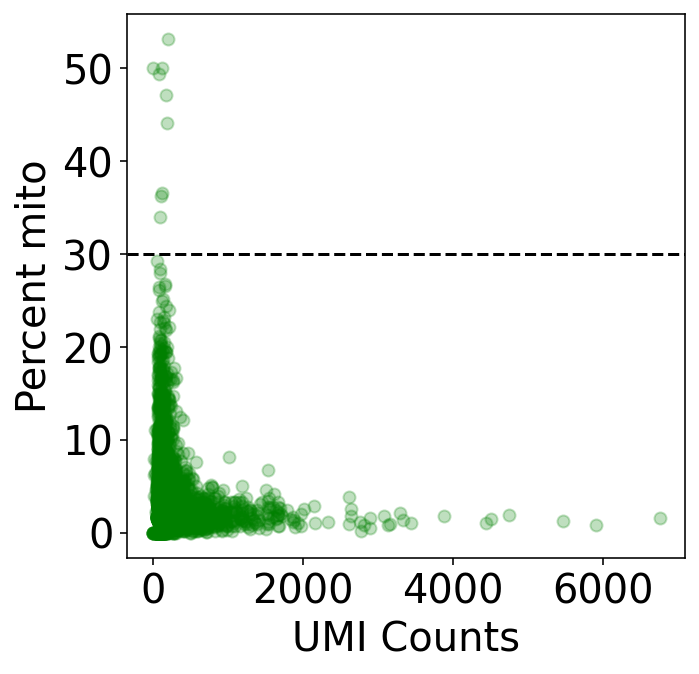

In [16]:
fig, ax = plt.subplots(figsize=(5,5))

x = nd(adata.obs["cell_counts"])
y = nd(adata.obs["percent_mito"])

ax.scatter(x, y, color="green", alpha=0.25)

ax.axhline(y=mito_criteria, linestyle="--", color="k")

ax.set_xlabel("UMI Counts")
ax.set_ylabel("Percent mito")

plt.show()

## Filter the anndata object

In [0]:
adata.obs["pass_count_filter"] = adata.obs["cell_counts"] > cell_threshold
adata.obs["pass_mito_filter"] = adata.obs.percent_mito < mito_criteria
adata.var["pass_gene_filter"] = adata.var["n_cells"] > gene_threshold

In [0]:
cell_mask = np.logical_and(adata.obs["pass_count_filter"].values, adata.obs["pass_mito_filter"].values)
gene_mask = adata.var["pass_gene_filter"].values

In [19]:
print("Current Shape: {:,} cells x {:,} genes".format(adata.shape[0], adata.shape[1]))
print("    New shape: {:,} cells x {:,} genes".format(cell_mask.sum(), gene_mask.sum()))

Current Shape: 3,362 cells x 55,421 genes
    New shape: 2,725 cells x 12,515 genes


In [0]:
data = adata[cell_mask, gene_mask]

In [21]:
data

View of AnnData object with n_obs × n_vars = 2725 × 12515 
    obs: 'cell_counts', 'n_genes', 'percent_mito', 'pass_count_filter', 'pass_mito_filter'
    var: 'gene_id', 'gene_name', 'gene_counts', 'n_cells', 'pass_gene_filter'

Keep in mind that the values in the `obs` and `var` are from the pre-filtered adata.

#### Exercise

To facilitate the sharing of data, AnnData has a built in function to save the `data` objecte that we have been computing on. Read https://icb-anndata.readthedocs-hosted.com/en/stable/index.html# to learn how to save the `data` object as an `h5ad` object.

## Analysis

Show those genes that yield the highest fraction of counts across cells.

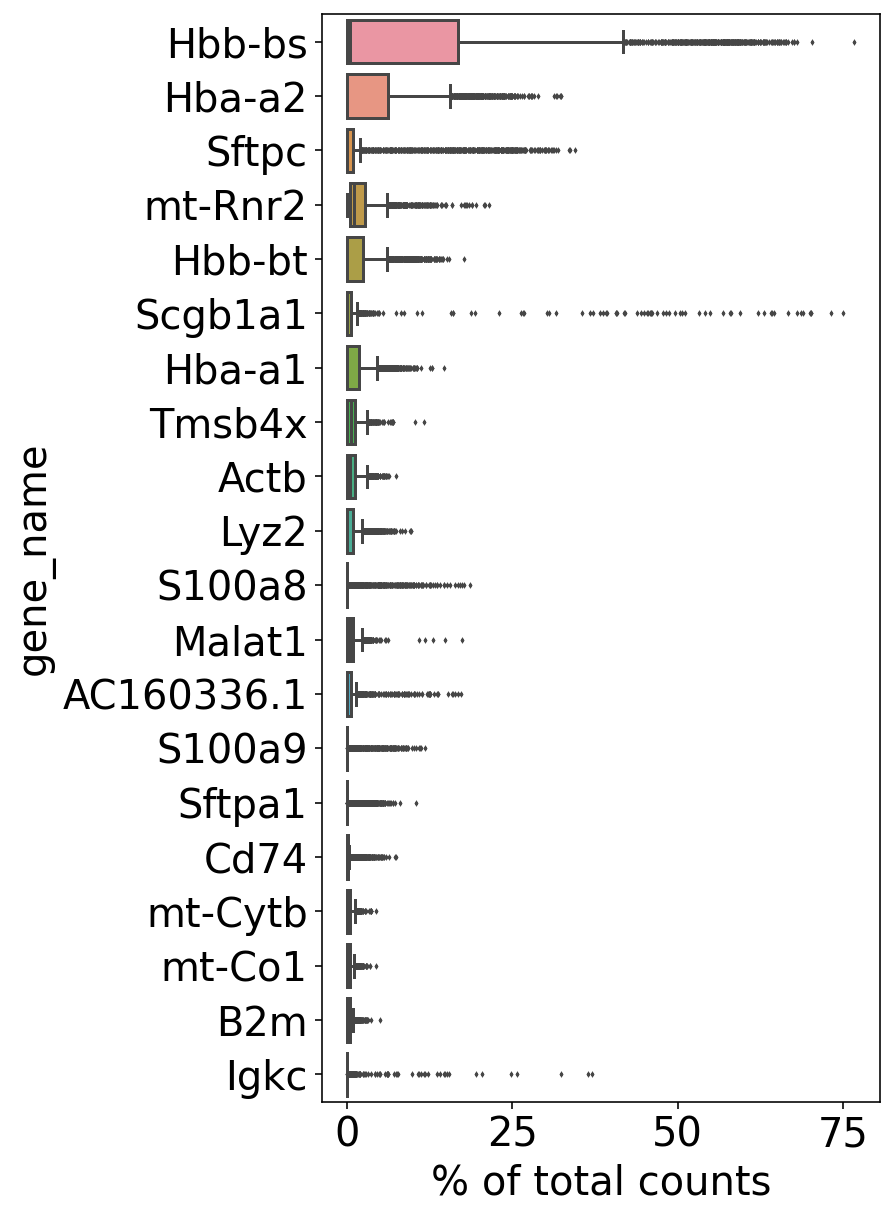

In [22]:
fig, ax = plt.subplots(figsize=(5, 10))
sc.pl.highest_expr_genes(data, n_top=20, ax = ax)

In [0]:
# setup

def vplot(y, ax):
    parts = ax.violinplot(
        y, showmeans=False, showmedians=False,
        showextrema=False)

    mean = y.mean()
    ax.scatter(1, mean, zorder=10, color="white")
    
    x = np.random.normal(1, 0.04, size=len(y))
    ax.scatter(x, y, color="k", s=1)
    
    for pc in parts['bodies']:
        pc.set_facecolor('#D43F3A')
        pc.set_edgecolor('black')
        pc.set_alpha(1)
    
    ax.set_xticks([1])
    ax.set_xticklabels([""])
    return ax

Plot distributions

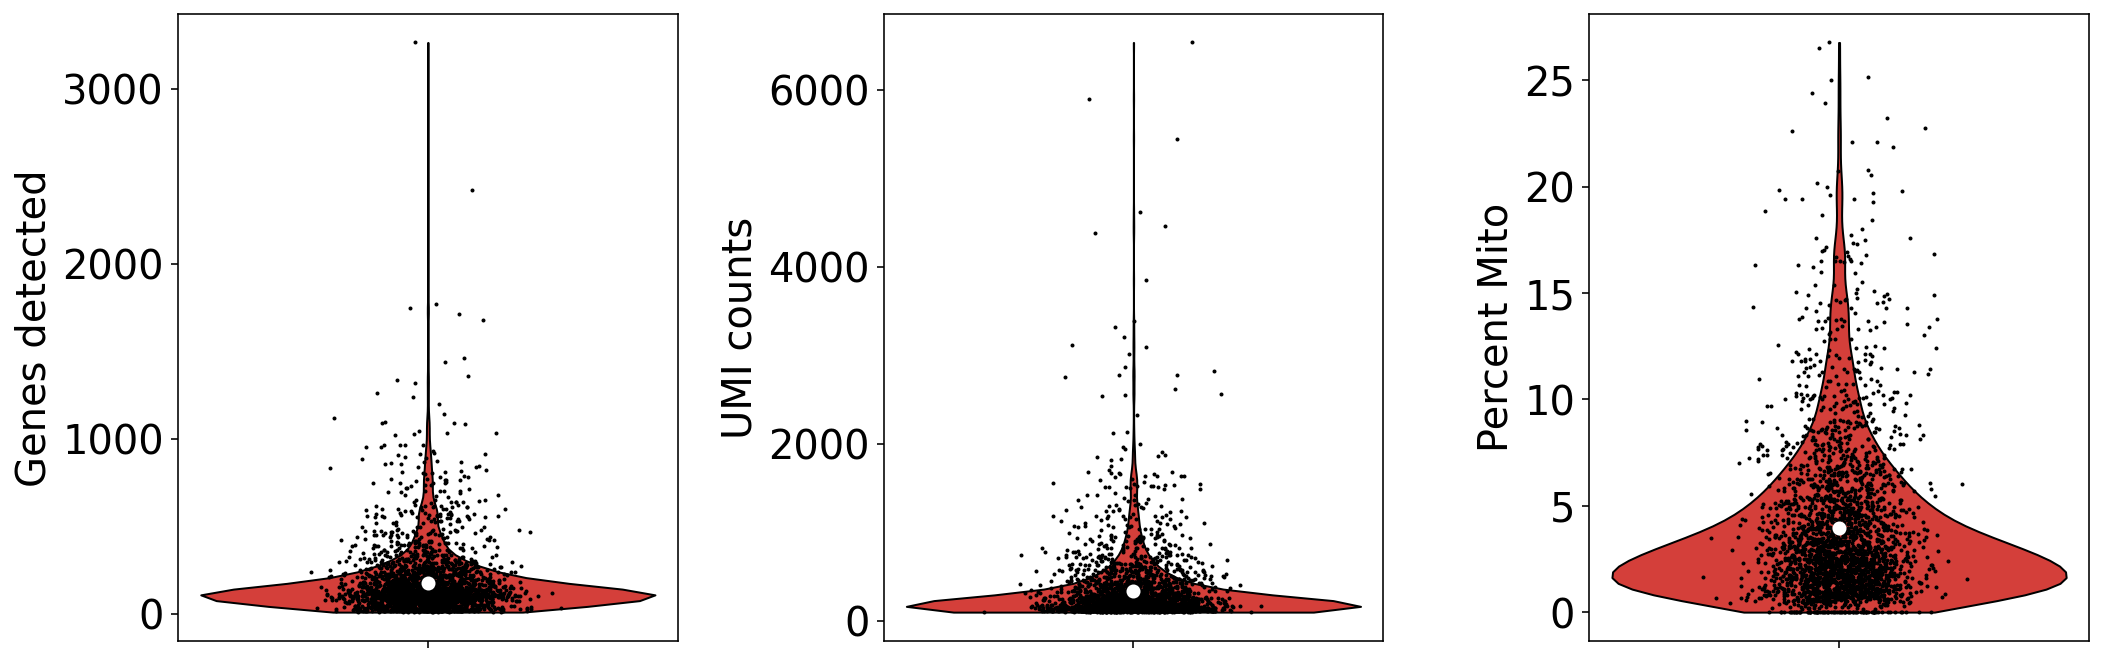

In [24]:
fig, ax = plt.subplots(figsize=(5*3,5), ncols=3)

x1 = data.obs["n_genes"]
x2 = nd(data.X.sum(axis=1))
x3 = data.obs["percent_mito"]

vplot(x1, ax[0])
vplot(x2, ax[1])
vplot(x3, ax[2])

ax[0].set_ylabel("Genes detected")
ax[1].set_ylabel("UMI counts")
ax[2].set_ylabel("Percent Mito")

plt.tight_layout()
plt.show()

### Process the matrix for clustering, visualization, and DE

In [0]:
data.layers["raw"] = data.X

In [0]:
scale_num = 1000000
data.layers["norm"] = normalize(data.X, norm="l1", axis=1)*scale_num

In [0]:
data.layers["log1p"] = np.log1p(data.layers["norm"])
data.uns = OrderedDict([("log1p", {"base":None})])

In [0]:
data.X = data.layers["log1p"]

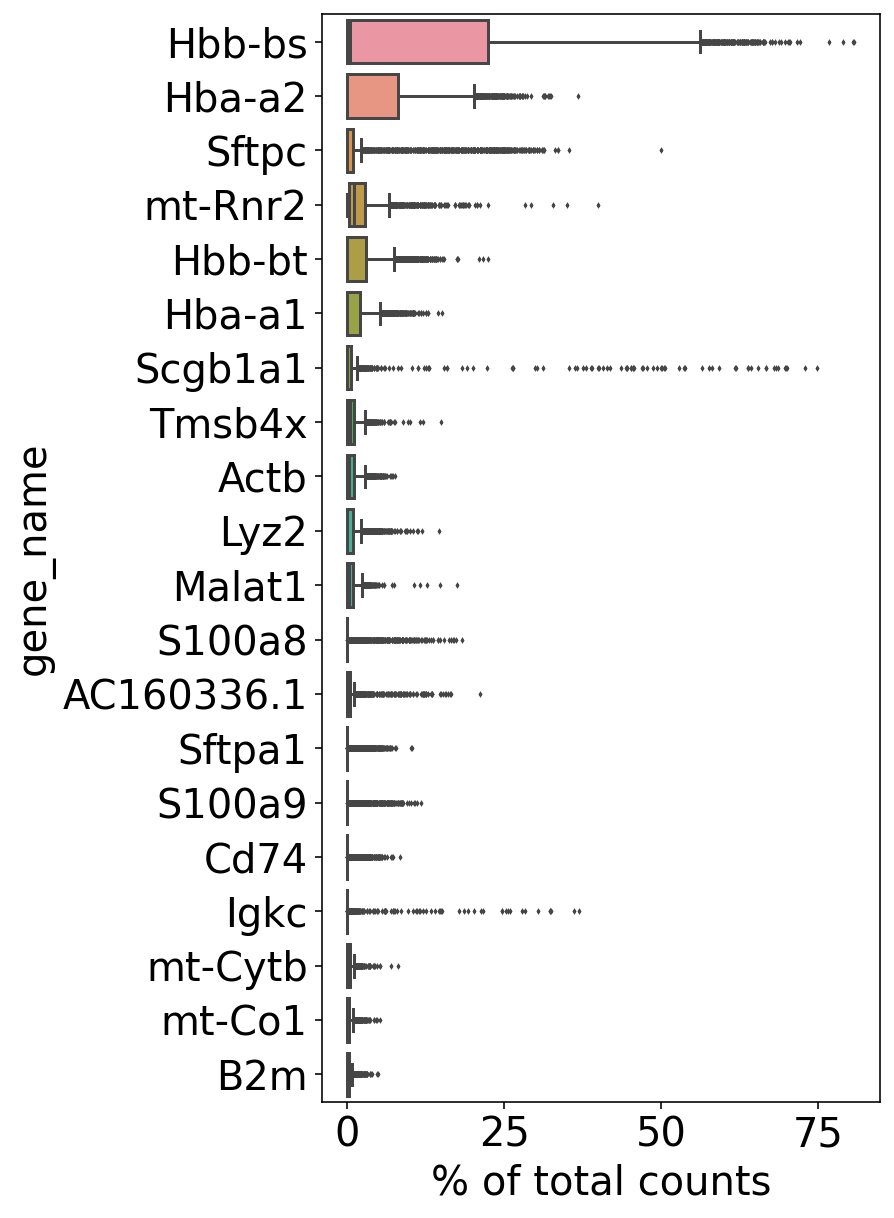

In [29]:
fig, ax = plt.subplots(figsize=(5, 10))
sc.pl.highest_expr_genes(adata, n_top=20, ax=ax)

Detecting highly variable genes is done on the log1p(norm) data

In [0]:
sc.pp.highly_variable_genes(data, n_top_genes=n_top_genes, flavor=flavor, n_bins=n_bins)
hvg_mask = data.var.highly_variable.values

Now we scale the columns of the matrix to unit variance and zero mean

In [31]:
%%time
# Scaling operation cannot be performed on the sparse matrix, so we make a dense matrix
mat = data.layers["log1p"].todense()
data.layers["scale"] = scale(mat, axis=0, with_mean=True, with_std=True, copy=True)
data.X = data.layers["scale"]

del mat

CPU times: user 1.08 s, sys: 139 ms, total: 1.21 s
Wall time: 1.22 s


### Generating visualizations

## PCA on highly variable genes

In [32]:
%%time
# PCA
X = data.X[:,hvg_mask]

tsvd = TruncatedSVD(n_components=num_PCA)
data.obsm["X_pca"] = tsvd.fit_transform(X)

CPU times: user 2.06 s, sys: 213 ms, total: 2.27 s
Wall time: 1.23 s


## Clustering

In [0]:
sc.pp.neighbors(data, n_neighbors=n_neighbors, n_pcs=num_PCA, random_state=state)

In [0]:
sc.tl.leiden(data, random_state=state)

## Dimensionality reduction

In [0]:
# TSNE
X = data.obsm["X_pca"]

tsne = TSNE(n_components=num_TSNE, metric=metric, random_state=state)
data.obsm["X_pca_tsne"] = tsne.fit_transform(X)

In [0]:
# NCA
X = data.X
y = data.obs.leiden.values # you could use louvain here also

nca = NeighborhoodComponentsAnalysis(n_components=num_NCA,random_state=state)
data.obsm["X_nca"] = nca.fit_transform(X, y)

In [0]:
# TSNE the NCA
X = data.obsm["X_nca"]
tsne = TSNE(n_components=num_TSNE, metric=metric, random_state=state)
data.obsm["X_nca_tsne"] = tsne.fit_transform(X)

### Visualize

#### PCA followed by t-SNE

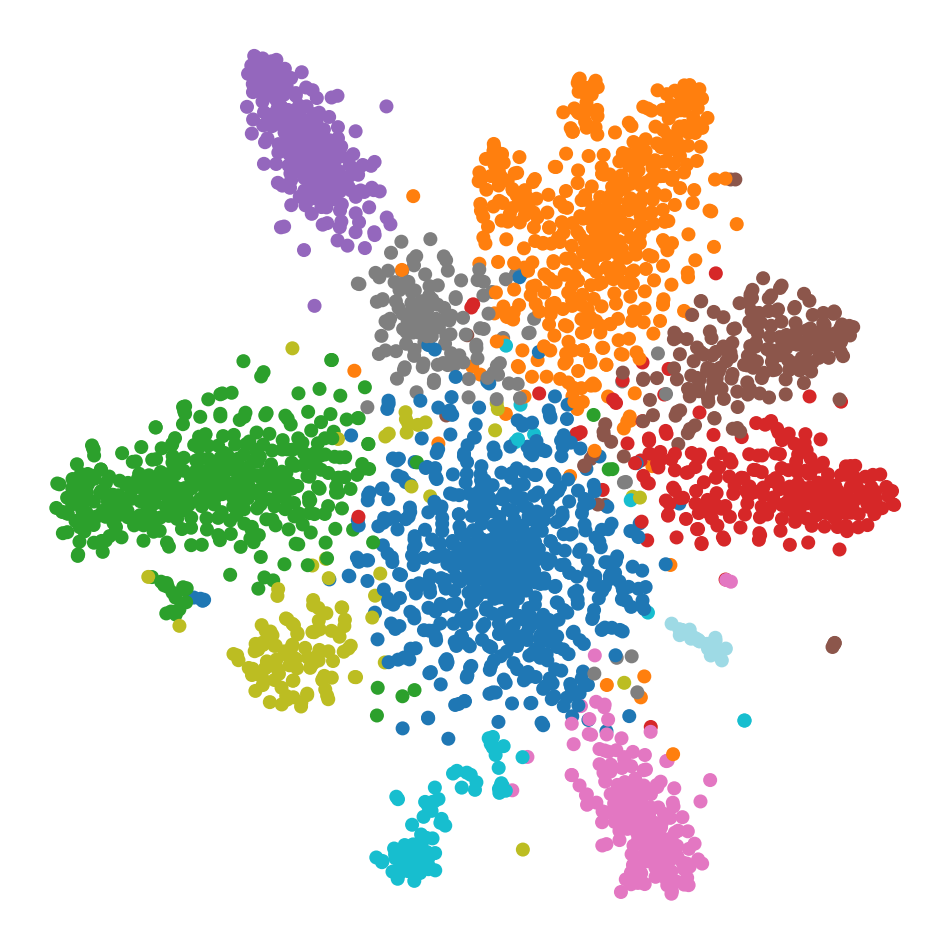

In [38]:
fig, ax = plt.subplots(figsize=(7,7))

x = data.obsm["X_pca_tsne"][:,0]
y = data.obsm["X_pca_tsne"][:,1]
c = data.obs["leiden"].astype(int)

ax.scatter(x, y, c = c, cmap='tab20')

ax.set_axis_off()

plt.tight_layout()
plt.show()

#### NCA followed by t-SNE

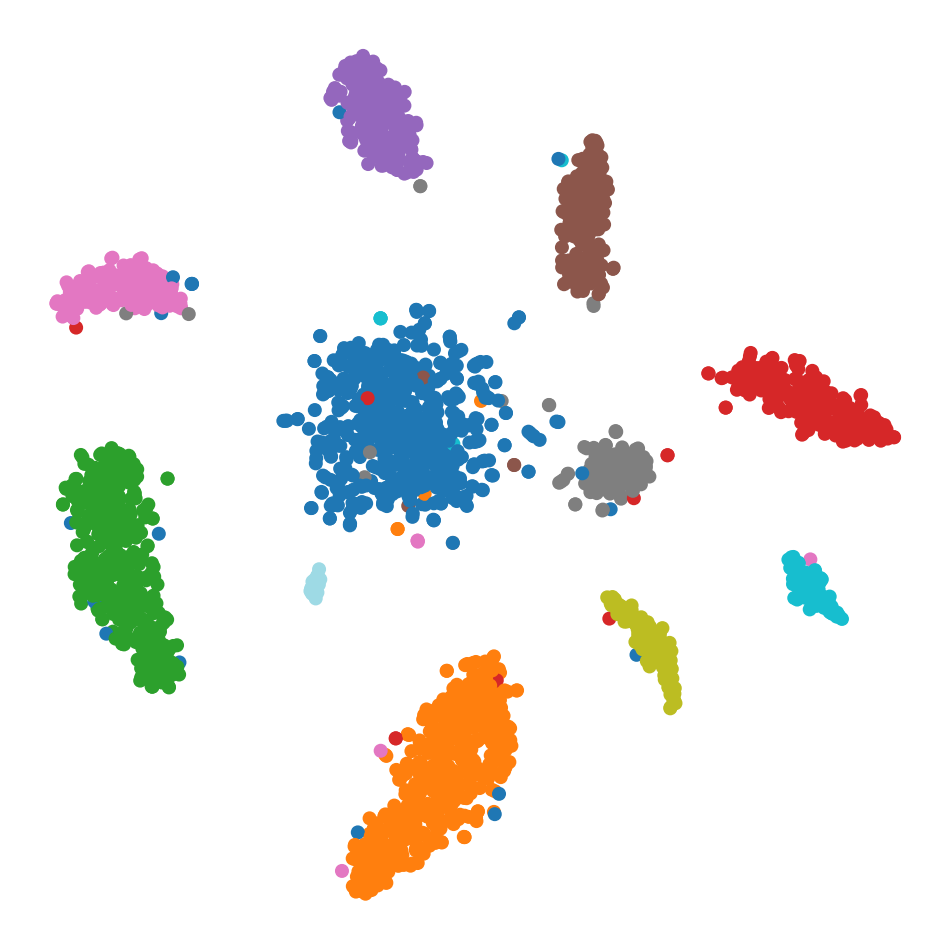

In [39]:
fig, ax = plt.subplots(figsize=(7,7))

x = data.obsm["X_nca_tsne"][:,0]
y = data.obsm["X_nca_tsne"][:,1]
c = data.obs["leiden"].astype(int)

ax.scatter(x, y, c = c, cmap='tab20')

ax.set_axis_off()

plt.tight_layout()
plt.show()

#### Exercise

How does this visualization depend on the number of NCA dimensions? What if instead of NCA followed by t-SNE  you reduce dimension with PCA followed by t-SNE? How do the results differ?

### Find marker genes

A key aspect of annotating a cell atlas is identifying "marker genes". These are genes specific to individual clusters that "mark" them, and are important both for assigning functions to cell clusters, and for designing downstream experiments to probe activity of clusters. 

A gene marker analysis begins with ranking genes in each cluster according to how different they are relative to other clusters. Typically the t-test is used for this purpose.

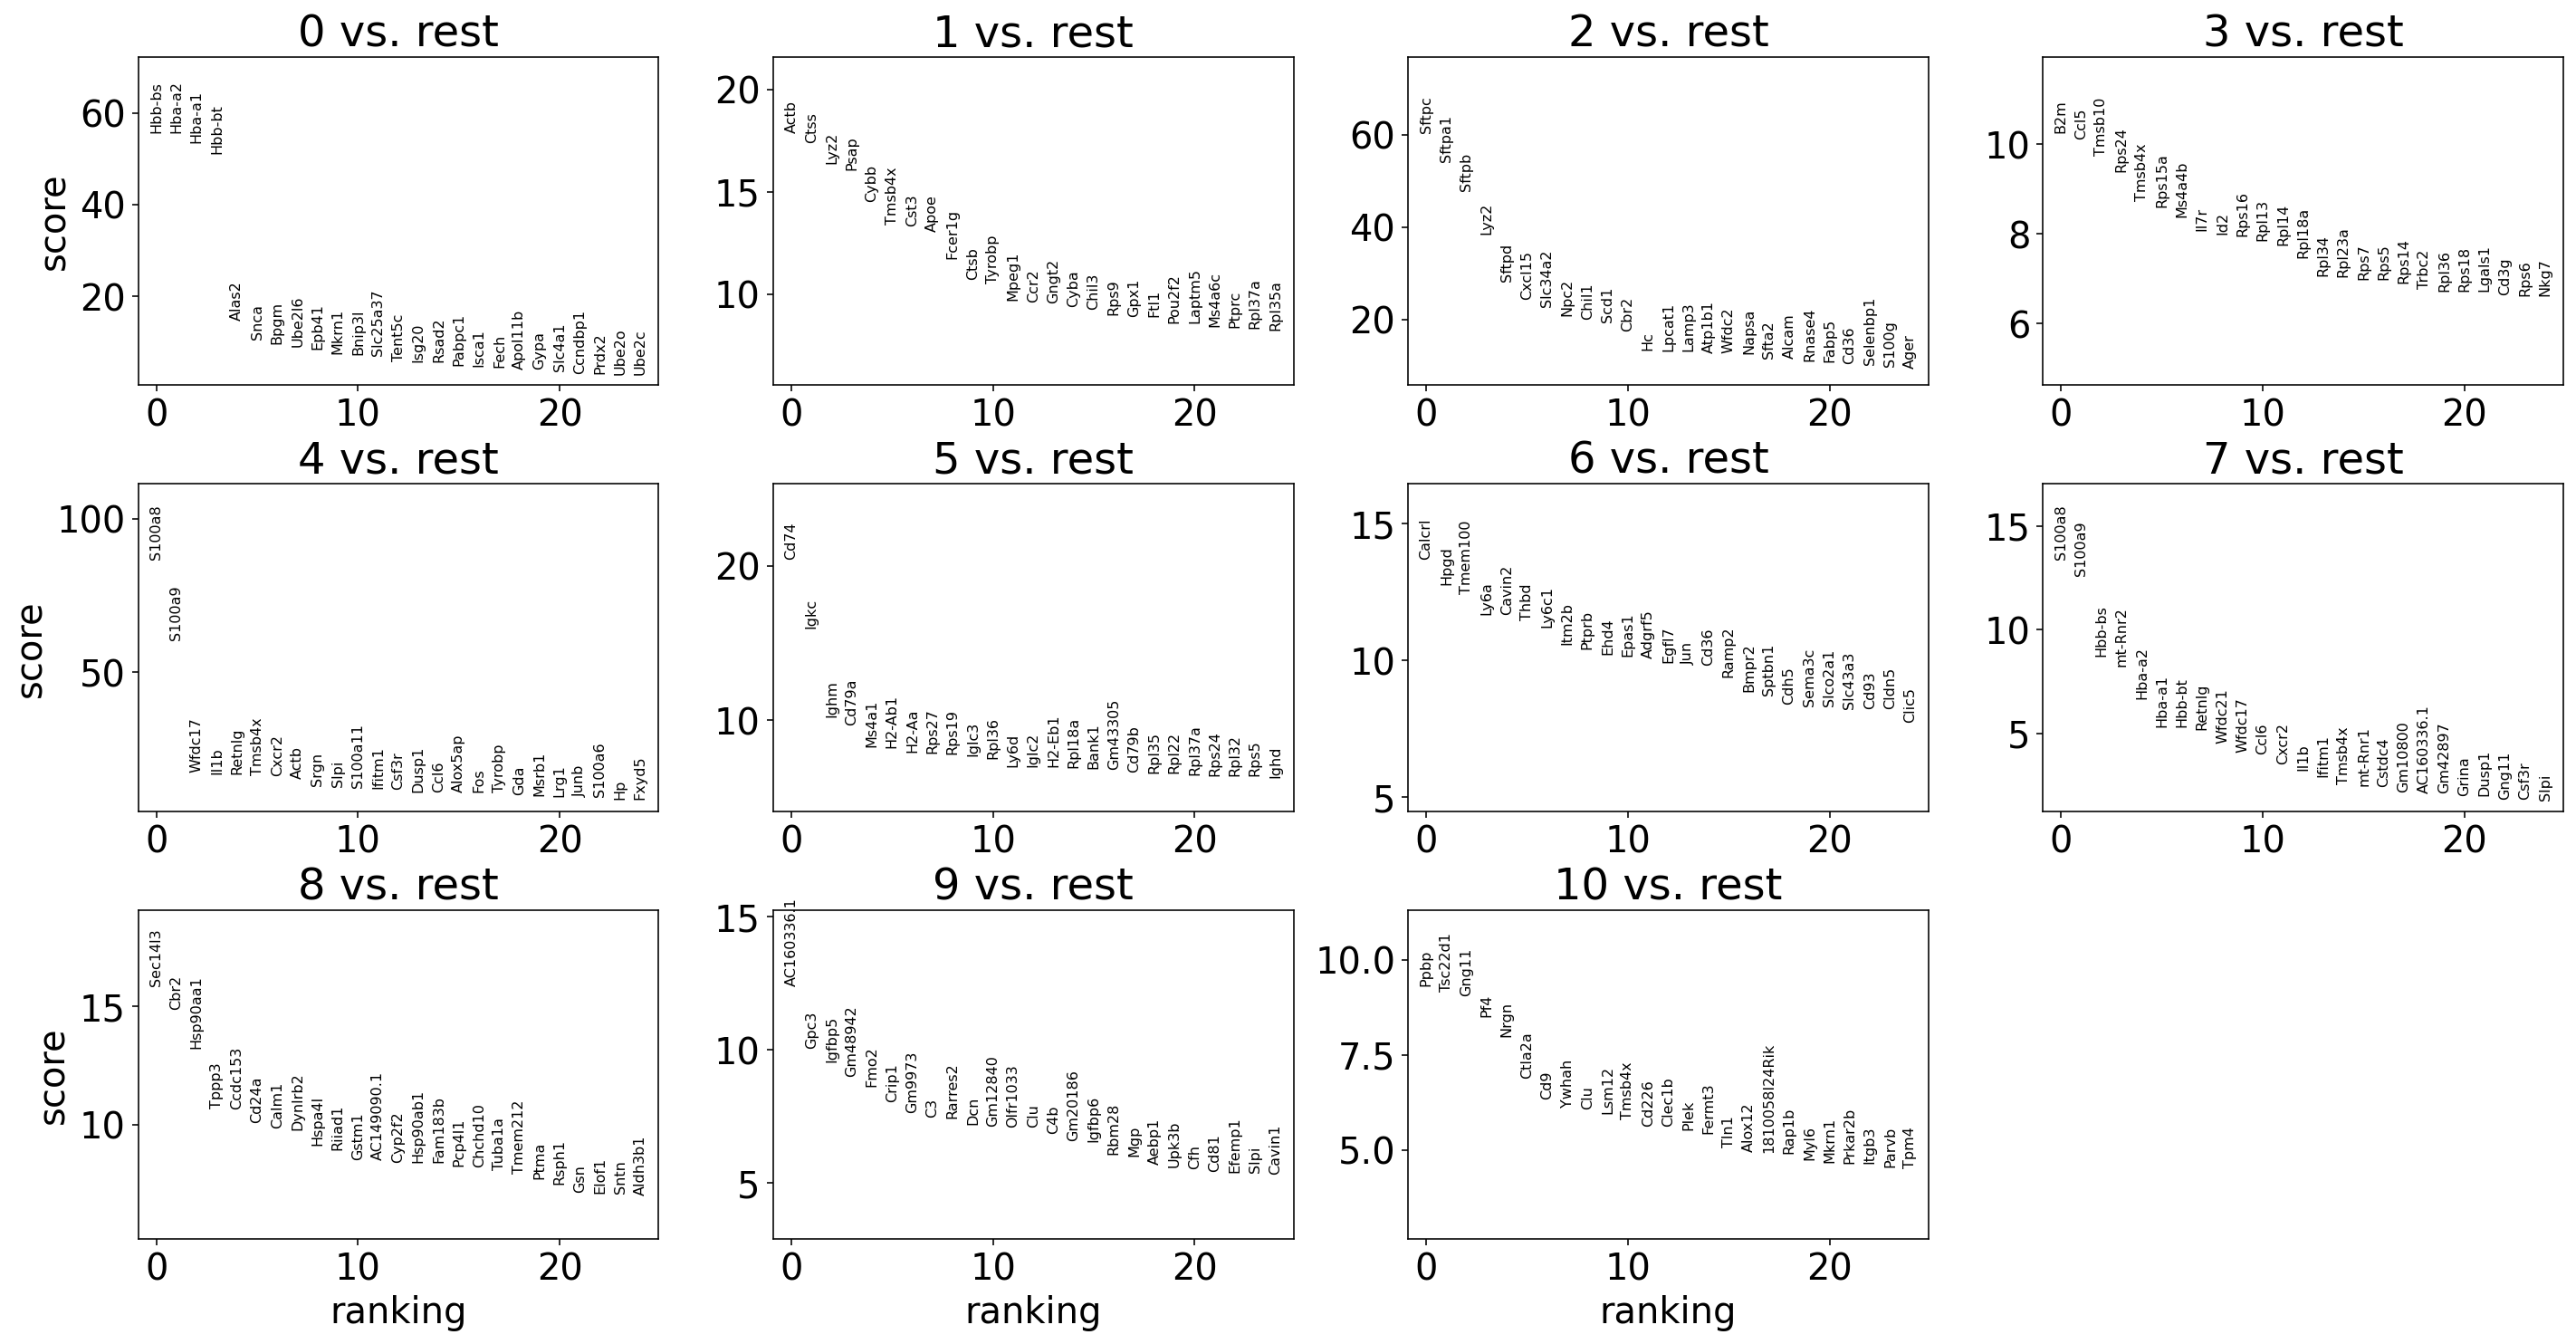

In [40]:
sc.tl.rank_genes_groups(data, 'leiden', method='t-test', corr_method="bonferroni")
sc.pl.rank_genes_groups(data, n_genes=25, sharey=False)

An alternative to the parametric t-test is the non-parametric [Wilcoxon rank-sum (Mann-Whitney-U)](https://de.wikipedia.org/wiki/Wilcoxon-Mann-Whitney-Test) test.

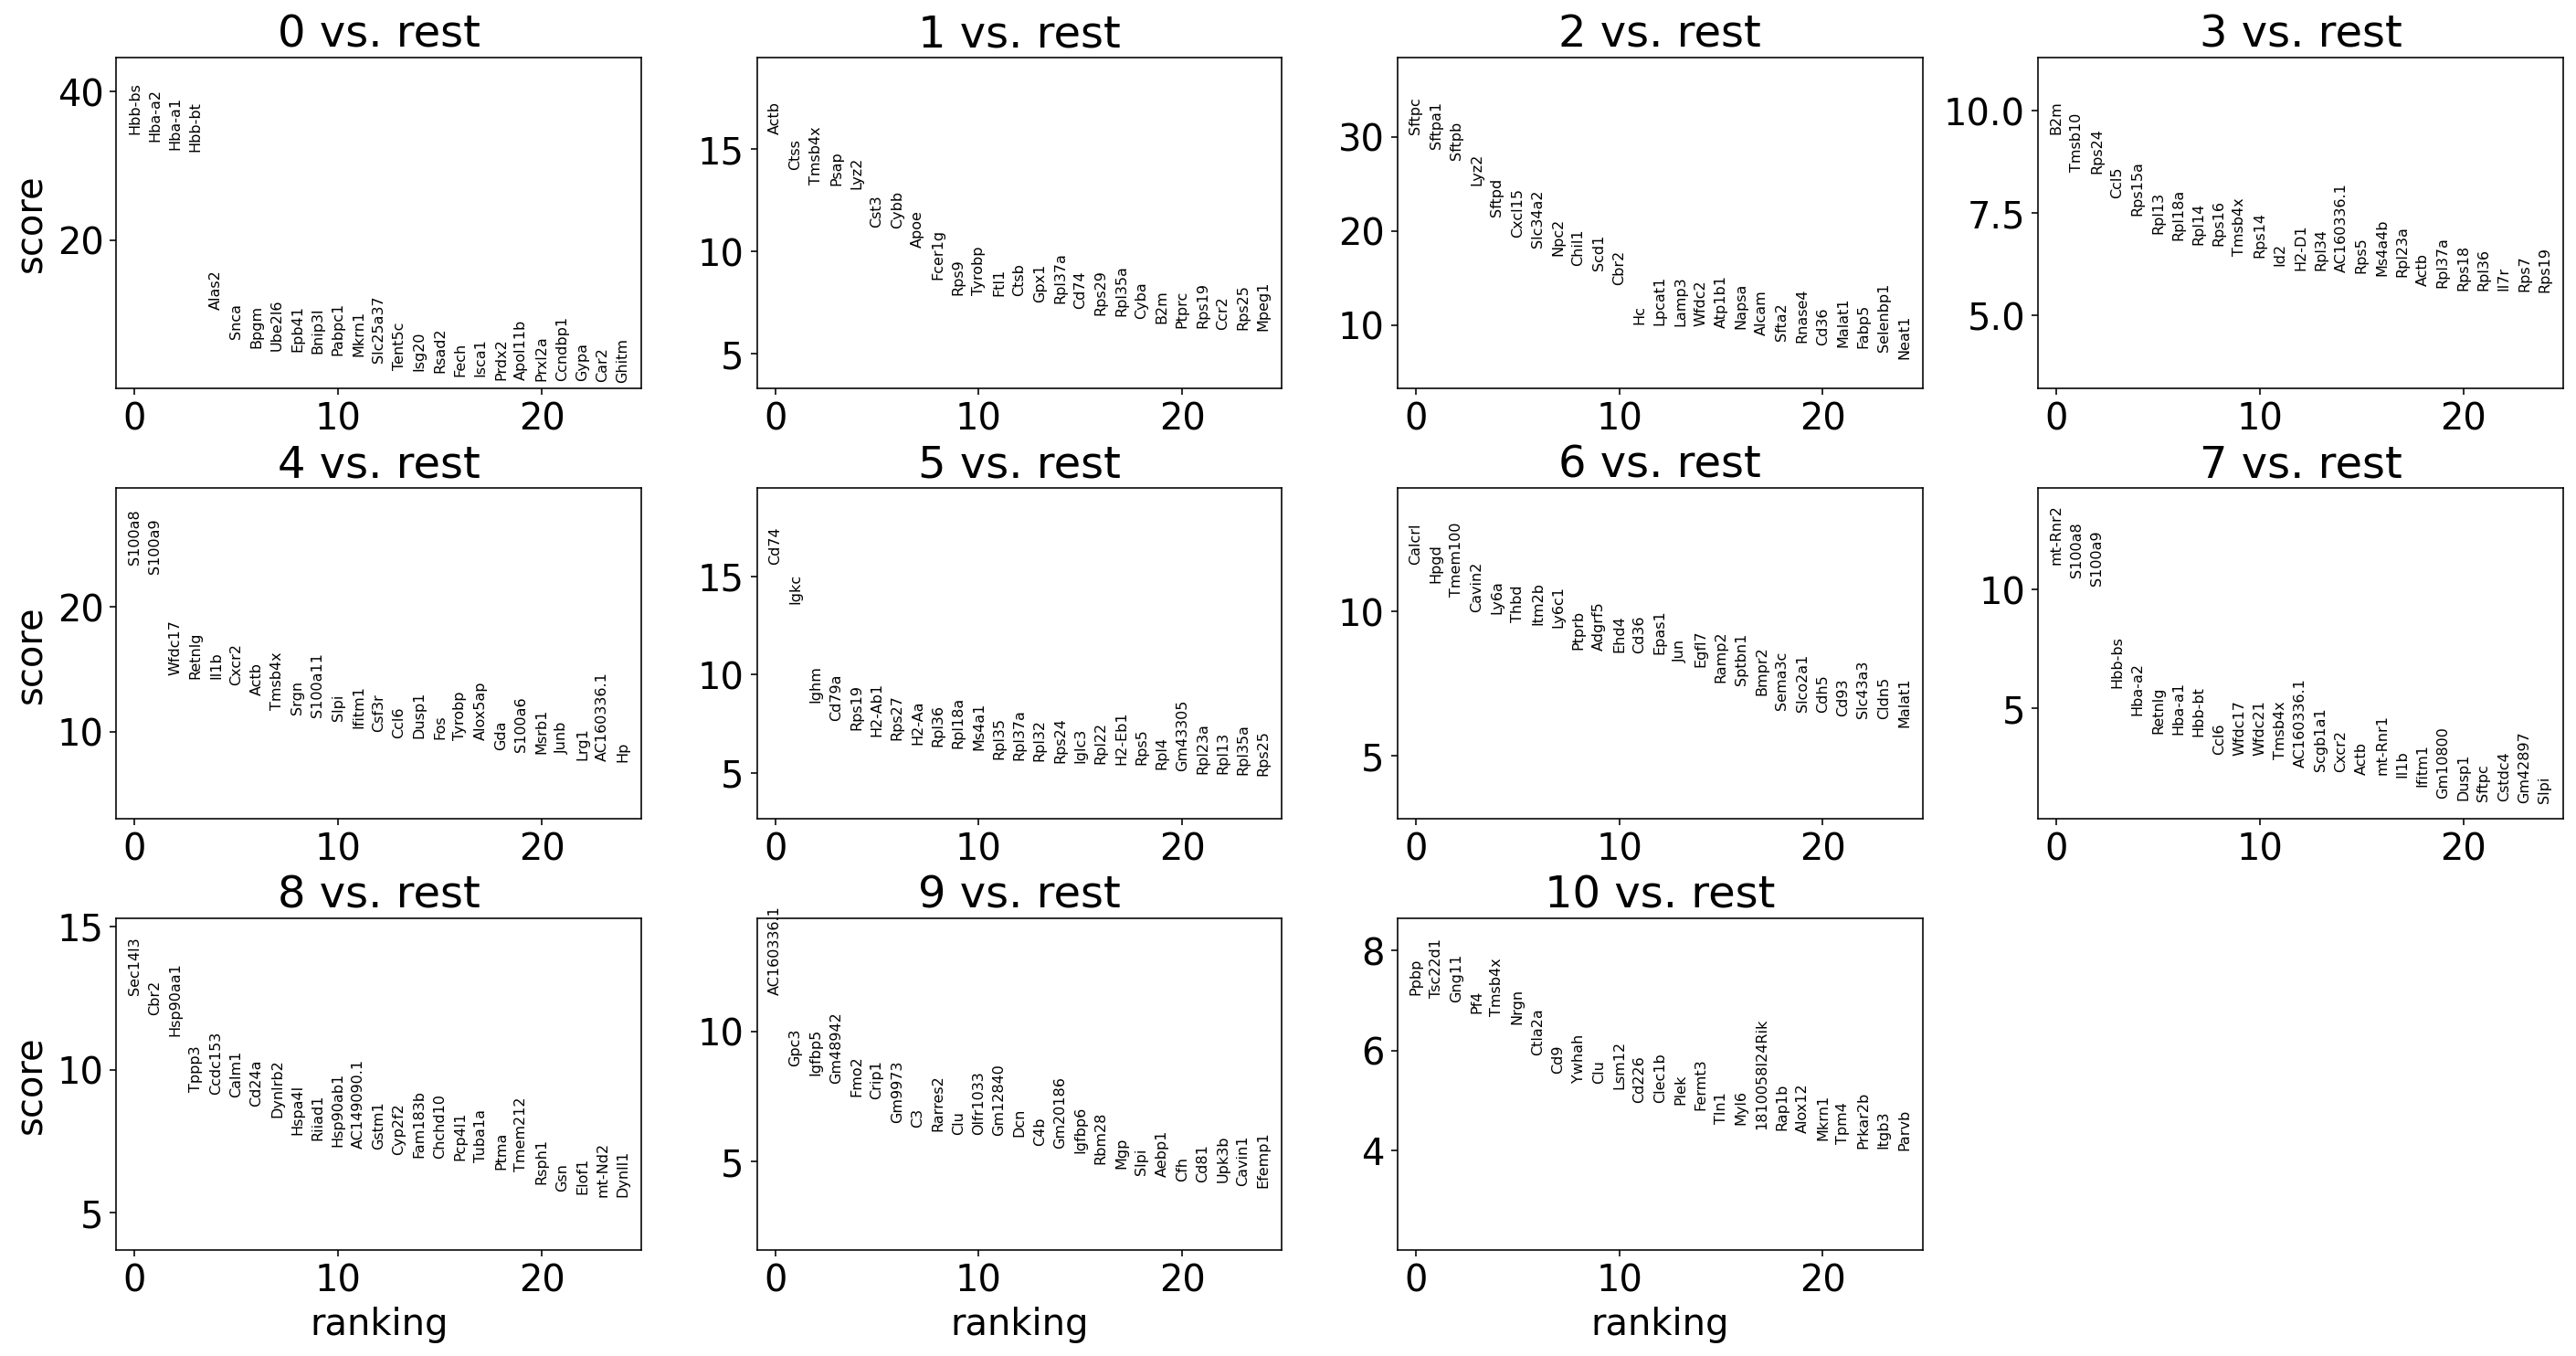

In [41]:
sc.tl.rank_genes_groups(data, 'leiden', method='wilcoxon', corr_method="bonferroni")
sc.pl.rank_genes_groups(data, n_genes=25, sharey=False)

As an alternative, genes can be ranked using logistic regression (see [Natranos et al. (2018)](https://doi.org/10.1101/258566)).

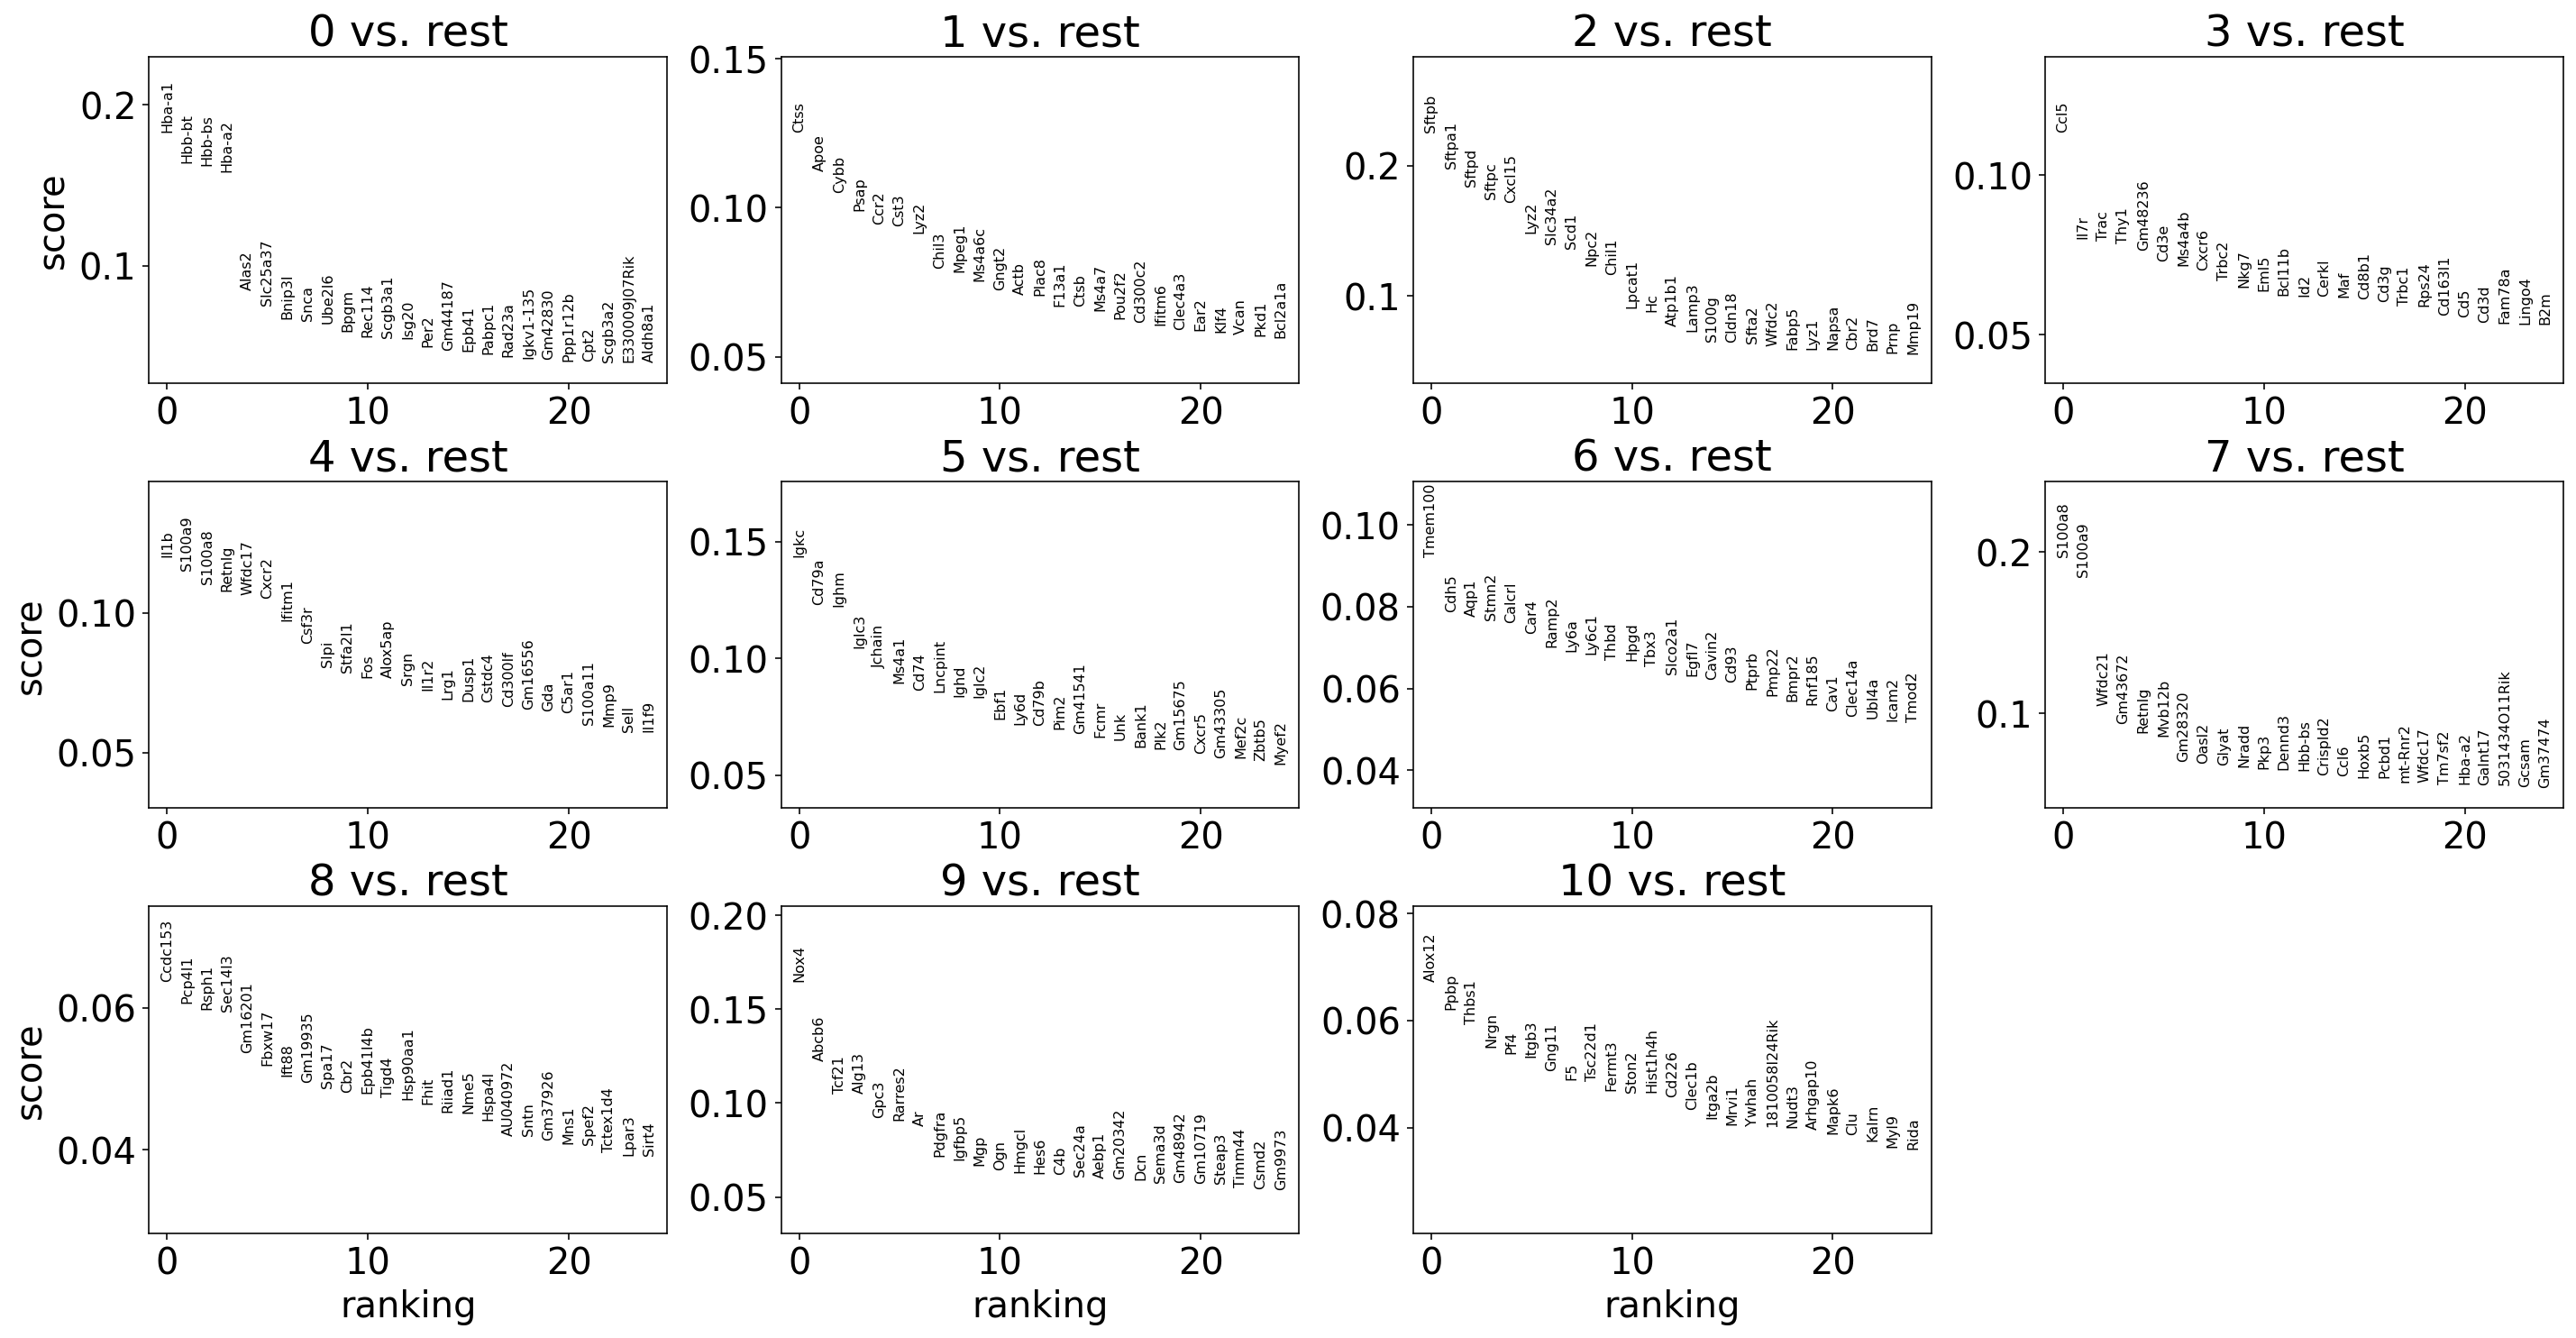

In [42]:
sc.tl.rank_genes_groups(data, 'leiden', method='logreg')
sc.pl.rank_genes_groups(data, n_genes=25, sharey=False)

In [0]:
sc.tl.rank_genes_groups(data, 'leiden', method='wilcoxon', corr_method="bonferroni")

Show the 10 top ranked genes per cluster in a dataframe.

In [44]:
pd.DataFrame(data.uns['rank_genes_groups']['names']).head(10)

0       1        2       3  ...        7         8           9       10
0  Hbb-bs    Actb    Sftpc     B2m  ...  mt-Rnr2   Sec14l3  AC160336.1     Ppbp
1  Hba-a2    Ctss   Sftpa1  Tmsb10  ...   S100a8      Cbr2        Gpc3  Tsc22d1
2  Hba-a1  Tmsb4x    Sftpb   Rps24  ...   S100a9  Hsp90aa1      Igfbp5    Gng11
3  Hbb-bt    Psap     Lyz2    Ccl5  ...   Hbb-bs     Tppp3     Gm48942      Pf4
4   Alas2    Lyz2    Sftpd  Rps15a  ...   Hba-a2   Ccdc153        Fmo2   Tmsb4x
5    Snca    Cst3   Cxcl15   Rpl13  ...   Retnlg     Calm1       Crip1     Nrgn
6    Bpgm    Cybb  Slc34a2  Rpl18a  ...   Hba-a1     Cd24a      Gm9973   Ctla2a
7  Ube2l6    Apoe     Npc2   Rpl14  ...   Hbb-bt   Dynlrb2          C3      Cd9
8   Epb41  Fcer1g    Chil1   Rps16  ...     Ccl6    Hspa4l     Rarres2    Ywhah
9  Bnip3l    Rps9     Scd1  Tmsb4x  ...   Wfdc17    Riiad1         Clu      Clu

[10 rows x 11 columns]

Create a table with the marker genes, p-values, clusters.

In [0]:
genes = pd.DataFrame(data.uns['rank_genes_groups']['names']).to_numpy()
pvals = pd.DataFrame(data.uns['rank_genes_groups']['pvals']).to_numpy()

In [0]:
unique = np.unique(data.obs.leiden.values.astype(int)).astype(str)
markers_gene = pd.DataFrame(index=unique, columns=["gene_name", "p_value"])

In [0]:
for un, u in enumerate(unique):
    g = genes[:,un]
    p = pvals[:,un]
    markers_gene.loc[u]["gene_name"]  = g.tolist()
    markers_gene.loc[u]["p_value"] = p.tolist()

In [0]:
markers_gene = markers_gene.apply(pd.Series.explode).reset_index()
markers_gene = markers_gene.rename(columns={"index":'leiden'})

In [49]:
markers_gene.drop_duplicates(["leiden"]) # just showing the top candidate per cluster

leiden   gene_name       p_value
0         0      Hbb-bs  9.69599e-258
100       1        Actb    6.8948e-56
200       2       Sftpc  8.76546e-202
300       3         B2m   3.89341e-21
400       4      S100a8  2.50566e-121
500       5        Cd74   5.21757e-55
600       6      Calcrl   2.71518e-31
700       7     mt-Rnr2   1.85912e-28
800       8     Sec14l3   1.83129e-36
900       9  AC160336.1   4.56431e-30
1000     10        Ppbp   1.12025e-12

In [0]:
def vplot_de(x, unique, specific_gene, specific_cluster, ax):
    unique = unique.astype(str)
    labels = unique
    lidx = np.arange(1, len(labels)+1)  # the label locations
    midx = np.where(unique==specific_cluster)[0][0]
    
    
    parts = ax.violinplot(x, showmedians=False, showextrema=False)
    for pcidx, pc in enumerate(parts['bodies']):
        pc.set_facecolor('grey')
        pc.set_edgecolor('black')
        pc.set_alpha(1)
        if pcidx == midx:
            pc.set_facecolor('#D43F3A')
            
    mean = [np.mean(i) for i in x]
    ax.scatter(lidx, mean, marker='o', color='white', s=30, zorder=3)
    
    ax.set_ylabel("$log(CPM + 1)$".format(specific_gene))
    ax.set_xticks(lidx)
    ax.set_xticklabels(labels, rotation=0, ha="center")
    ax.set_title("{} gene in cluster {}".format(specific_gene, specific_cluster))
    
    return ax

In [0]:
specific_cluster = markers_gene.drop_duplicates(["leiden"])["leiden"].values
specific_gene = markers_gene.drop_duplicates(["leiden"])["gene_name"].values

In [52]:
unique

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'],
      dtype='<U21')

### Plot one cluster, gene pair

In [53]:
fig, ax = plt.subplots(figsize=(6, 3))

spec_c = specific_cluster[1]
spec_g = specific_gene[1]

x = []
for c in unique:
    x.append(nd(data[data.obs.leiden==str(c)][:,data.var.gene_name==spec_g].layers["log1p"].todense()).tolist())
    
vplot_de(x, unique, spec_g, spec_c, ax=ax)

ax.set_ylabel("$log(CPM+1)$")

plt.show()

### Plot all cluster gene pairs

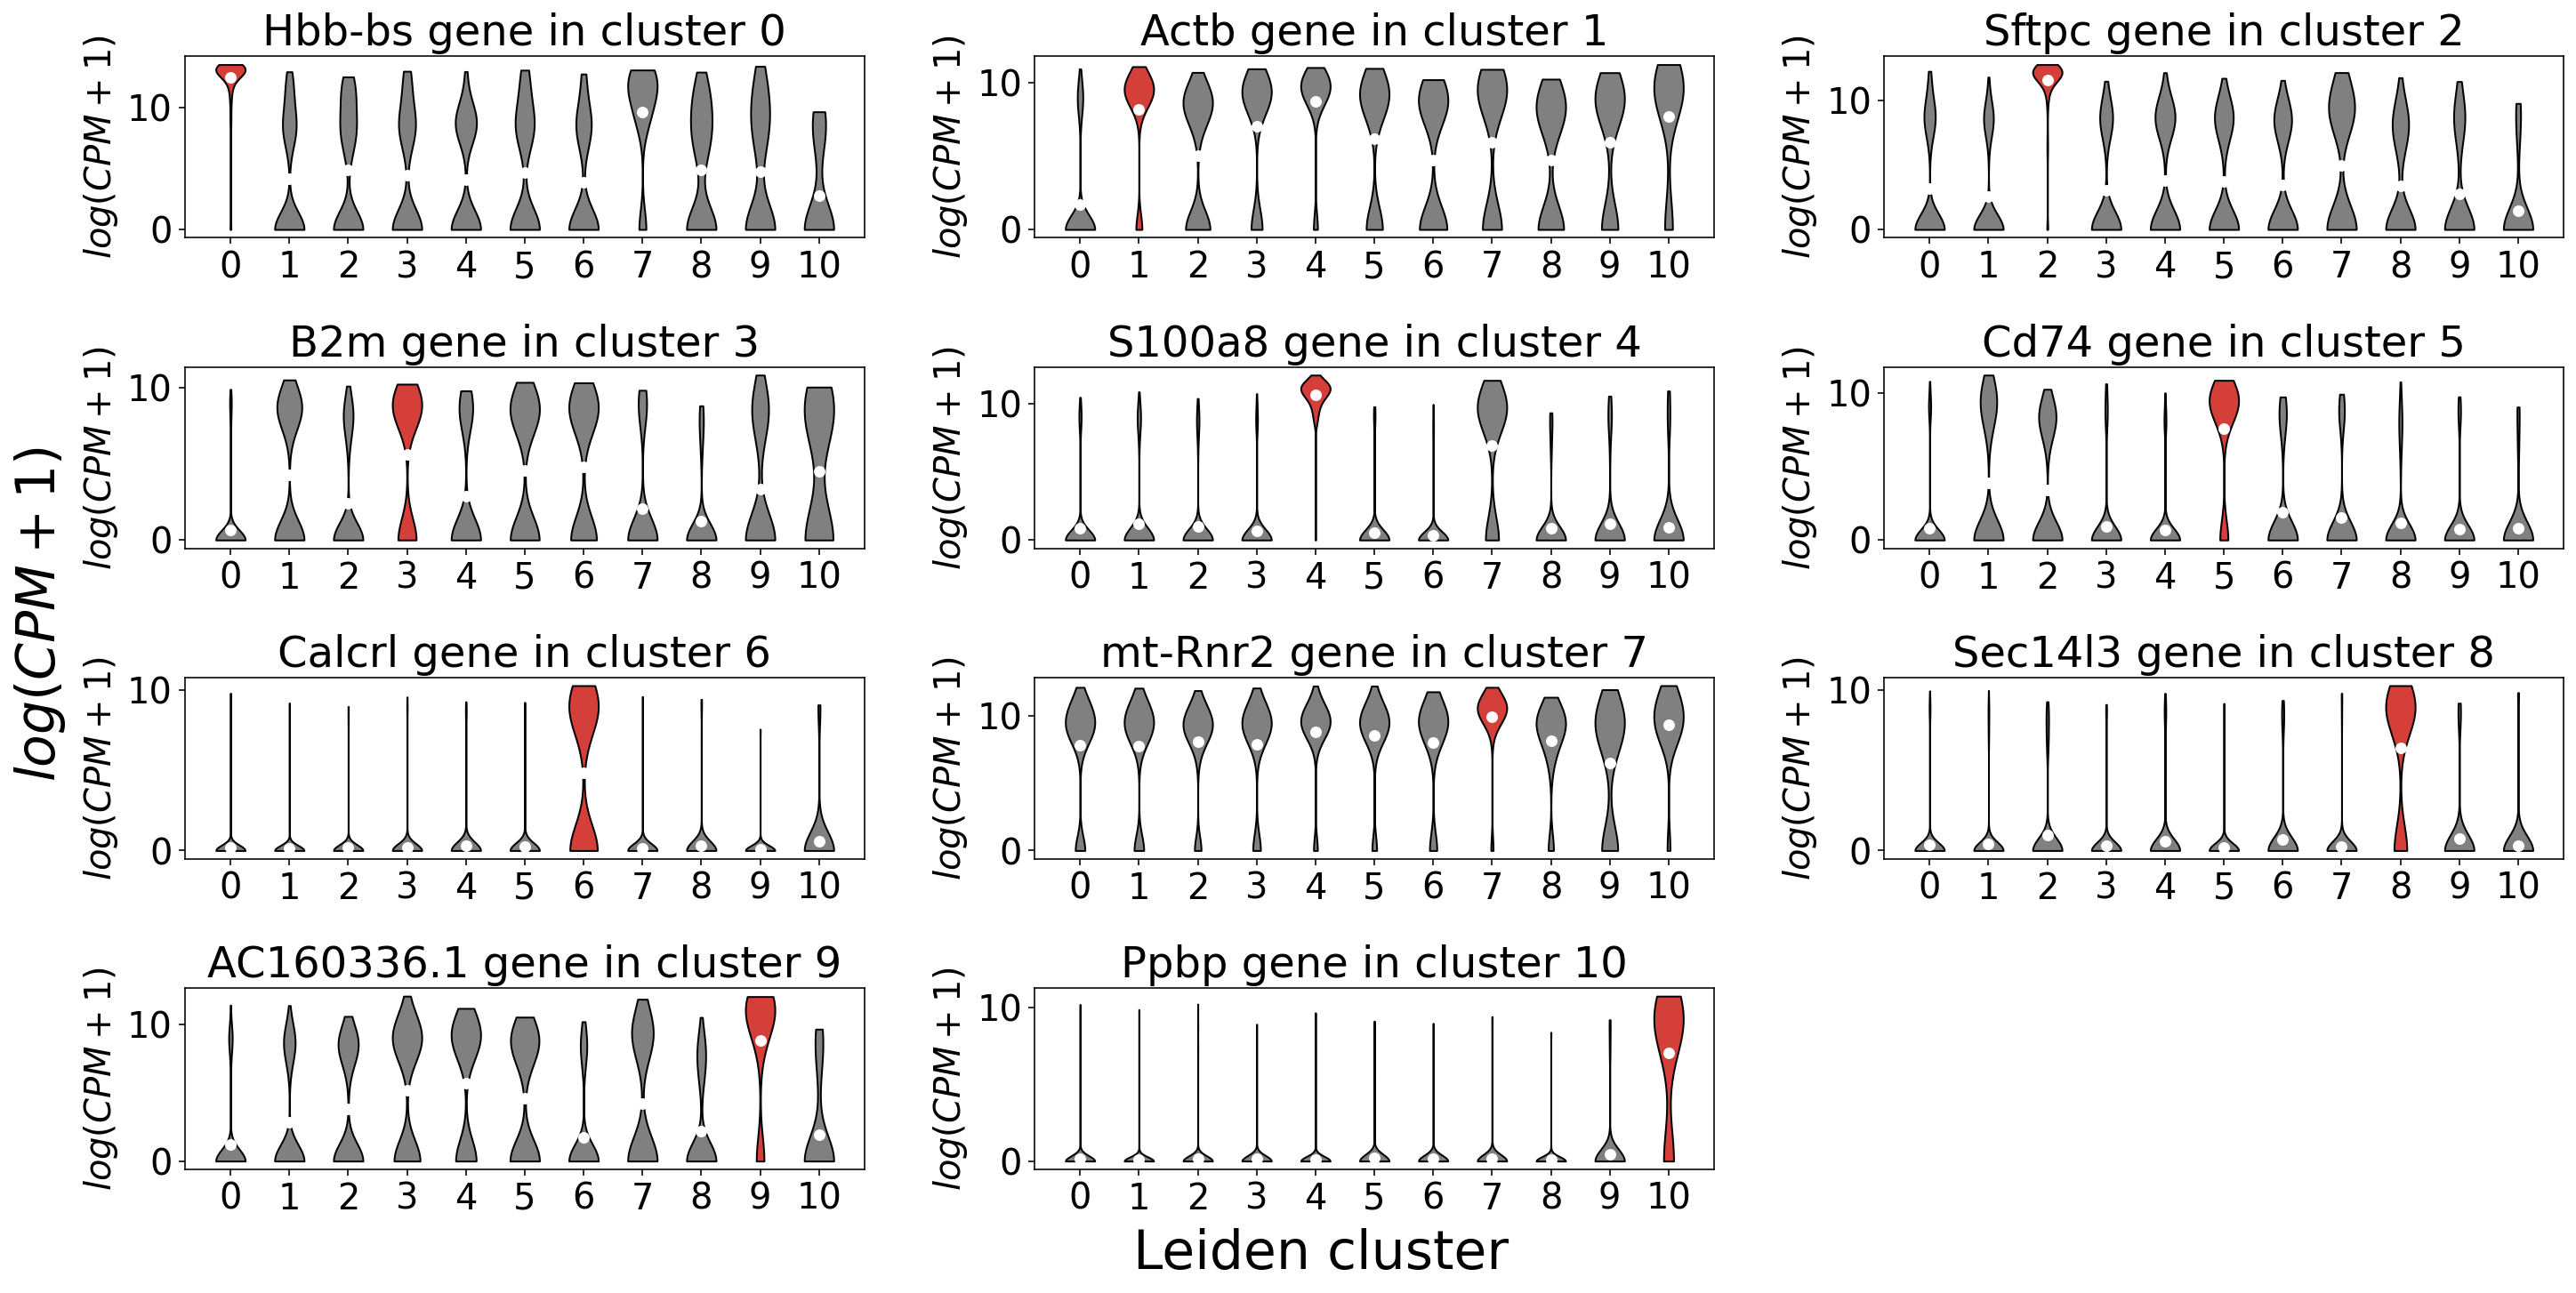

In [54]:
length = len(specific_cluster)*5
height = 3

fig, ax = plt.subplots(figsize=(20,10), ncols = 3, nrows=4)

axs = trim_axs(ax, len(specific_cluster))

for sn, (spec_c, spec_g) in enumerate(zip(specific_cluster, specific_gene)):
    x = []
    for c in unique:
        x.append(nd(data[data.obs.leiden==str(c)][:,data.var.gene_name==spec_g].layers["log1p"].todense()).tolist())
        
    vplot_de(x, unique, spec_g, spec_c, ax=axs[sn])
    
    
fig.text(0.5, 0, 'Leiden cluster', ha='center', va='center', fontsize=30)
fig.text(0, 0.5, '$log(CPM +1)$', ha='center', va='center', rotation='vertical', fontsize=30)
plt.tight_layout()

plt.show()

### Visualize expression patterns of a specific marker gene

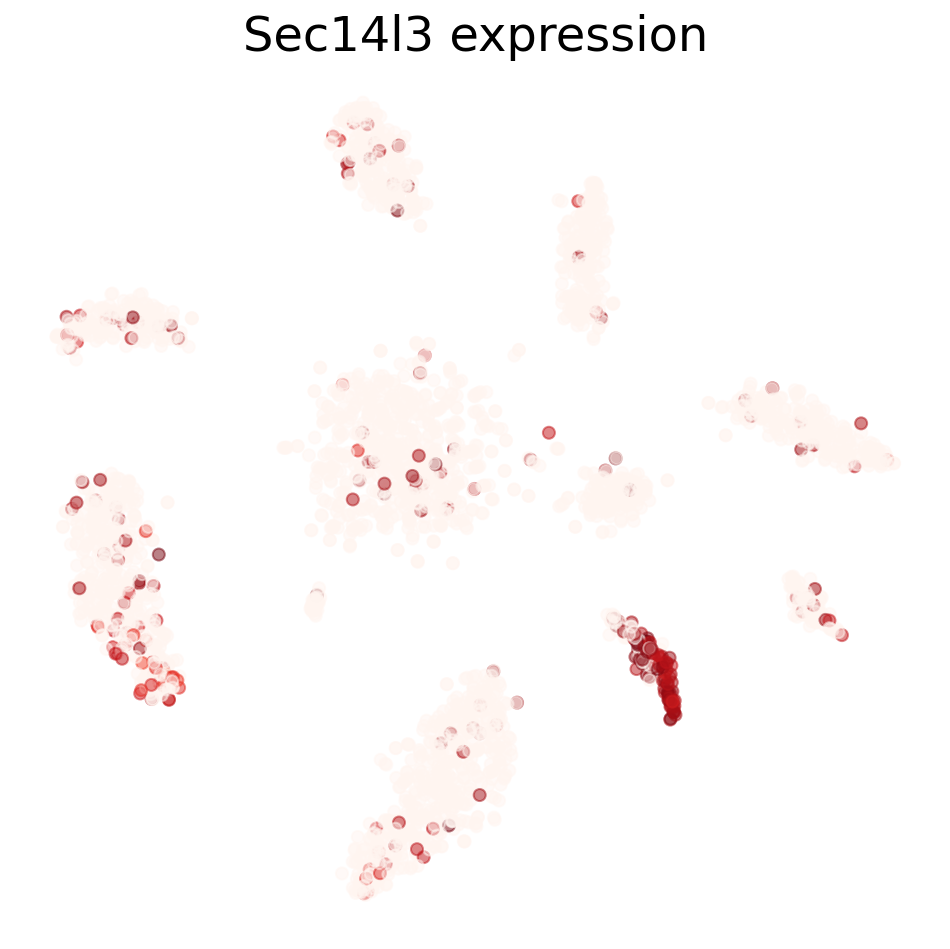

In [55]:
gene = "Sec14l3"

fig, ax = plt.subplots(figsize=(7,7))

x = data.obsm["X_nca_tsne"][:,0]
y = data.obsm["X_nca_tsne"][:,1]
c = nd(data.layers["log1p"].todense()[:,data.var.gene_name==gene])

ax.scatter(x, y, c = c, cmap='Reds', alpha=0.5)

ax.set_axis_off()
ax.set_title("{} expression".format(gene))
plt.tight_layout()
plt.show()

### Annotate clusters

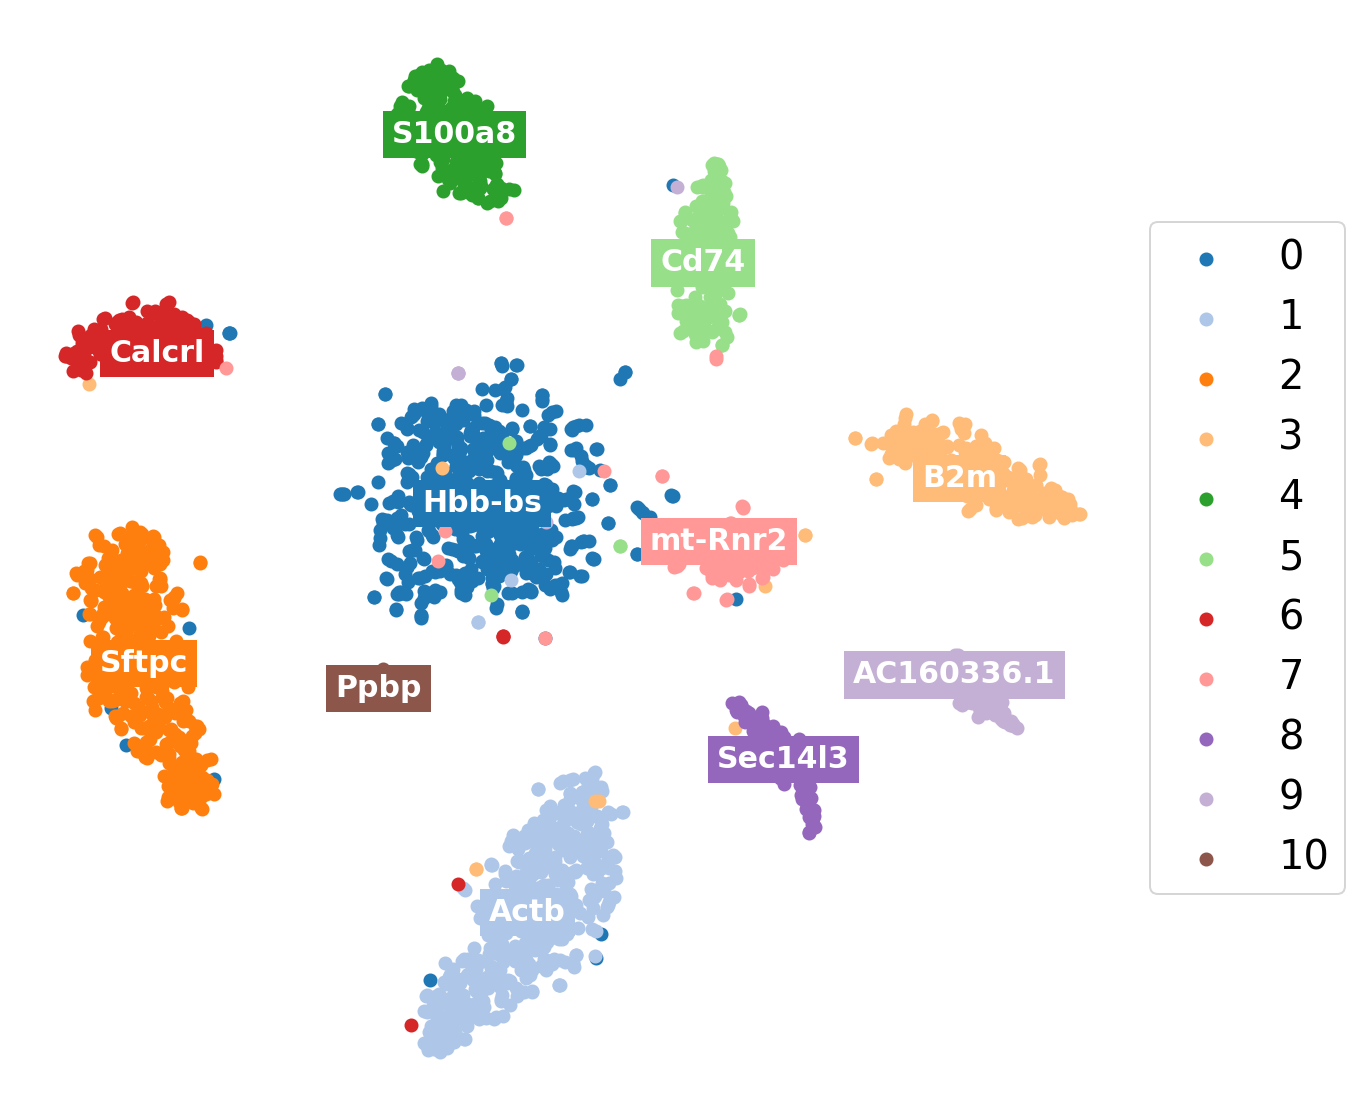

In [56]:
fig, ax = plt.subplots(figsize=(10,10))

c = np.unique(data.obs["leiden"].values.astype(int)).astype(str)
cmap = cm.get_cmap("tab20")

for idx, (cluster, gene) in enumerate(zip(c, specific_gene)):
    XX = data[data.obs.leiden == cluster,:].obsm["X_nca_tsne"]
    
    x = XX[:,0]
    y = XX[:,1]
    ax.scatter(x, y, color = cmap(idx), label=cluster)
    ax.annotate(gene, 
             (np.mean(x), np.mean(y)),
             horizontalalignment='center',
             verticalalignment='center',
             size=15, weight='bold',
             color="white",
               backgroundcolor=cmap(idx)) 
    

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_axis_off()
plt.show()

In [0]:
top_idx = [np.where(i == data.var.gene_name.values)[0][0] for i in specific_gene]

In [0]:
mat = data.layers["norm"].todense()
obs = data.obs
var = data.var

In [59]:
fig, axs = plt.subplots(figsize=(20,20), nrows=len(unique))
fig.subplots_adjust(wspace=0, hspace=0)


labels = specific_gene
lidx = np.arange(0, len(top_idx), 1)
means = []

for cidx, (c, ax) in enumerate(zip(unique, axs)):
    tmp_mat = mat[obs.leiden==str(c),:]
    
    x = tmp_mat[:,top_idx]
    means.append(nd(np.median(x,axis=0)))

    v = ax.violinplot(x.T.tolist(), showmedians=False, showextrema=False, positions=lidx)

    for pcidx, pc in enumerate(v['bodies']):
        pc.set_edgecolor('black')
        pc.set_alpha(1)
        pc.set_facecolor(cm.tab20c(cidx))
        

    means = [np.mean(i) for i in x.T]
    ax.scatter(lidx, means, marker='o', color='white', s=30, zorder=3)
 
    if cidx==0:
        ax_top = ax.twiny()
        ax_top.set_xlim(ax.get_xlim())
        ax_top.set_xticks(lidx)
        ax_top.set_xticklabels(labels, rotation=90, ha="center")
        ax_top.spines["top"].set_visible(True)
        ax_top.spines["left"].set_visible(False)
        ax_top.spines["bottom"].set_visible(False)
    if cidx == len(unique)-1:
        ax_bot = ax.twiny()
        ax_bot.set_xticks([])
        ax_bot.set_xticklabels([])
        ax_bot.spines["top"].set_visible(False)
        ax_bot.spines["left"].set_visible(False)
        ax_bot.spines["bottom"].set_visible(True)

    ax.set_xticklabels("")
    ax.yaxis.tick_right()
    ax.set_ylabel("{} [{:,}]".format(c, x.shape[0]), color="white",rotation="horizontal", ha="right",bbox=dict(boxstyle="square",ec="black",fc=cm.tab20c(cidx)))
    

    
    lim = nd(x.mean(axis=0))[cidx]*4
    
    ax.set_ylim(-lim*0.1, lim)
    
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

        
    
    

plt.tight_layout(pad=0, w_pad=0, h_pad=0)
fig.text(1, 0.5, 'CPM ', ha='center', va='center', rotation=270, fontsize=30)
plt.show()

### Expression of paper specific markers

In [0]:
markers = ["Ear2","Cd79b","Ednrb","Ccl17","Itgae",
           "Cd209a","Itgam","Itgax","Trbc2","Cd8b1","Foxj1",
           "Ly6c2","Plac8","Scgb1a1","Cxcr2","Prg4",
           "Bpifb1","Dcn","Col1a2","C1qb","Inmt","Mmrn1",
           "Ppbp","Msln","Gzma","Ngp","Mzb1","Acta2",
           "Sftpd","Rtkn2","Tmem100","Vwf"]
features = data.var.gene_name.values


In [0]:
midx = [np.where(i==features)[0][0] for i in markers]

In [0]:
assignments = data.obs.leiden.values

In [0]:
# for each cluster for each gene get two things
# 1 percent of cells in the cluster expressing that gene
# 2 average expression of that gene (for cells that are expressing it)


per = np.zeros((len(unique), len(markers)))
avg = np.zeros((len(unique), len(markers)))

mtx = data.layers["log1p"]#.todense()


for cn, c in enumerate(unique):
    tmp_mtx = mtx[assignments==c]
    sub_mtx = tmp_mtx[:,midx]
    
    avg[cn] = nd(sub_mtx.mean(axis=0))
    per[cn] = (sub_mtx>0).sum(axis=0)/sub_mtx.shape[0]

In [64]:
fig, ax = plt.subplots(figsize=(15,5))
xidx = np.arange(len(markers))
yidx = np.arange(len(unique))

xlabels = markers
ylabels = unique

X, Y = np.meshgrid(xidx, yidx)


for dn, d in enumerate(per):
    a = ax.scatter(X[dn],Y[dn], s=d*500+10, c = avg[dn], cmap="OrRd")

ax.set_xticks(xidx)
ax.set_yticks(yidx)

ax.set_xticklabels(xlabels, rotation=90, ha="center")
ax.set_yticklabels(ylabels)

ax.set_xlabel("Gene")
ax.set_ylabel("Cluster")

ax.figure.colorbar(a, ax=ax, label="$log(CPM+1)$")

handles =  [Line2D([0], [0], marker='o', color='w', label='  0%',markerfacecolor='black', markersize=7),
            Line2D([0], [0], marker='o', color='w', label=' 25%',markerfacecolor='black', markersize=10),
            Line2D([0], [0], marker='o', color='w', label=' 50%',markerfacecolor='black', markersize=12),
            Line2D([0], [0], marker='o', color='w', label=' 75%',markerfacecolor='black', markersize=13.5),
            Line2D([0], [0], marker='o', color='w', label='100%',markerfacecolor='black', markersize=17)]
ax.legend(handles=handles, loc="center left", bbox_to_anchor=(1.15,0.5), title="% of cells")

plt.show()

### Which cluster of cells do ACE2 expressing cells belong to?

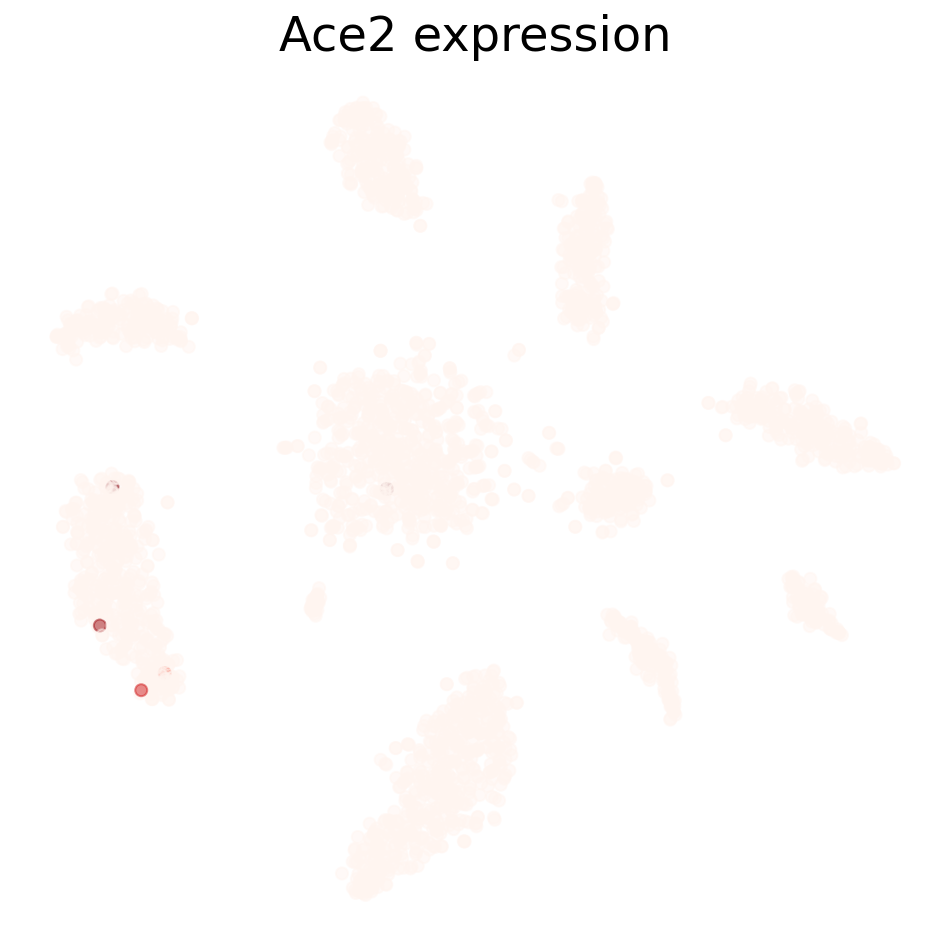

In [65]:
gene = "Ace2"

fig, ax = plt.subplots(figsize=(7,7))

x = data.obsm["X_nca_tsne"][:,0]
y = data.obsm["X_nca_tsne"][:,1]
c = nd(data.layers["log1p"].todense()[:,data.var.gene_name==gene])

ax.scatter(x, y, c = c, cmap='Reds', alpha=0.5)

ax.set_axis_off()
ax.set_title("{} expression".format(gene))
plt.tight_layout()
plt.show()

In [66]:
mask = nd(data.layers["log1p"].todense()[:,data.var.gene_name==gene])>0
print("There {} cells with non-zero expression of {}.".format(mask.sum(), gene))

There 5 cells with non-zero expression of Ace2.


In [67]:
pd.Series(assignments[mask]).value_counts().sort_index()

0     1
1     0
2     4
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

# To what extent is ACE2 expressed in all replicates from this paper?

In the interest of time we have preprocessed all n=8 young (3 month) and n=7 old (24 month) single cell rna-seq datasets of the lung in a similar way as above. We wil download the anndata object from a Box account.

In [68]:
%%time
!wget -O alldata.csv.gz https://caltech.box.com/shared/static/vrmwq6bshsddbfqqphvkqwwu0n8tpd29.gz
!gunzip alldata.csv.gz

--2020-03-26 07:26:58--  https://caltech.box.com/shared/static/vrmwq6bshsddbfqqphvkqwwu0n8tpd29.gz
Resolving caltech.box.com (caltech.box.com)... 107.152.24.197, 107.152.25.197
Connecting to caltech.box.com (caltech.box.com)|107.152.24.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/vrmwq6bshsddbfqqphvkqwwu0n8tpd29.gz [following]
--2020-03-26 07:26:59--  https://caltech.box.com/public/static/vrmwq6bshsddbfqqphvkqwwu0n8tpd29.gz
Reusing existing connection to caltech.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://caltech.app.box.com/public/static/vrmwq6bshsddbfqqphvkqwwu0n8tpd29.gz [following]
--2020-03-26 07:26:59--  https://caltech.app.box.com/public/static/vrmwq6bshsddbfqqphvkqwwu0n8tpd29.gz
Resolving caltech.app.box.com (caltech.app.box.com)... 107.152.25.199, 107.152.24.199
Connecting to caltech.app.box.com (caltech.app.box.com)|107.152.25.199|:443... connected.
HTTP request s

In [0]:
alldata = pd.read_csv("alldata.csv", index_col=0)

In [70]:
alldata

SRR  age  ...     tsne_0     tsne_1
AAAAAAAAAAAA-SRR8426368  SRR8426368    3  ...  26.656567 -10.758780
AAAACCGGAGGC-SRR8426368  SRR8426368    3  ...   1.006372   8.970454
AAAACGCACGTC-SRR8426368  SRR8426368    3  ... -15.425027 -17.166468
AAAACGTCTCTT-SRR8426368  SRR8426368    3  ...  21.341824 -20.960938
AAAAGACCAAAT-SRR8426368  SRR8426368    3  ...  -1.704366  26.945246
...                             ...  ...  ...        ...        ...
TTTTTCACGAAG-SRR8426363  SRR8426363   24  ...  21.519548   7.234487
TTTTTGAGCTGA-SRR8426363  SRR8426363   24  ... -19.984236  -4.490323
TTTTTGGCCGCT-SRR8426363  SRR8426363   24  ...  11.111578 -14.051846
TTTTTTATCAAA-SRR8426363  SRR8426363   24  ... -16.986694   2.059786
TTTTTTCCTTTC-SRR8426363  SRR8426363   24  ...  -9.890162 -41.673607

[66558 rows x 6 columns]

In [71]:
fig, ax = plt.subplots(figsize=(7,7))

x = alldata["tsne_0"]
y = alldata["tsne_1"]
c = alldata["leiden"].astype(int)

ax.scatter(x, y, c = c, cmap='tab20b')

ax.set_axis_off()

plt.tight_layout()
plt.show()

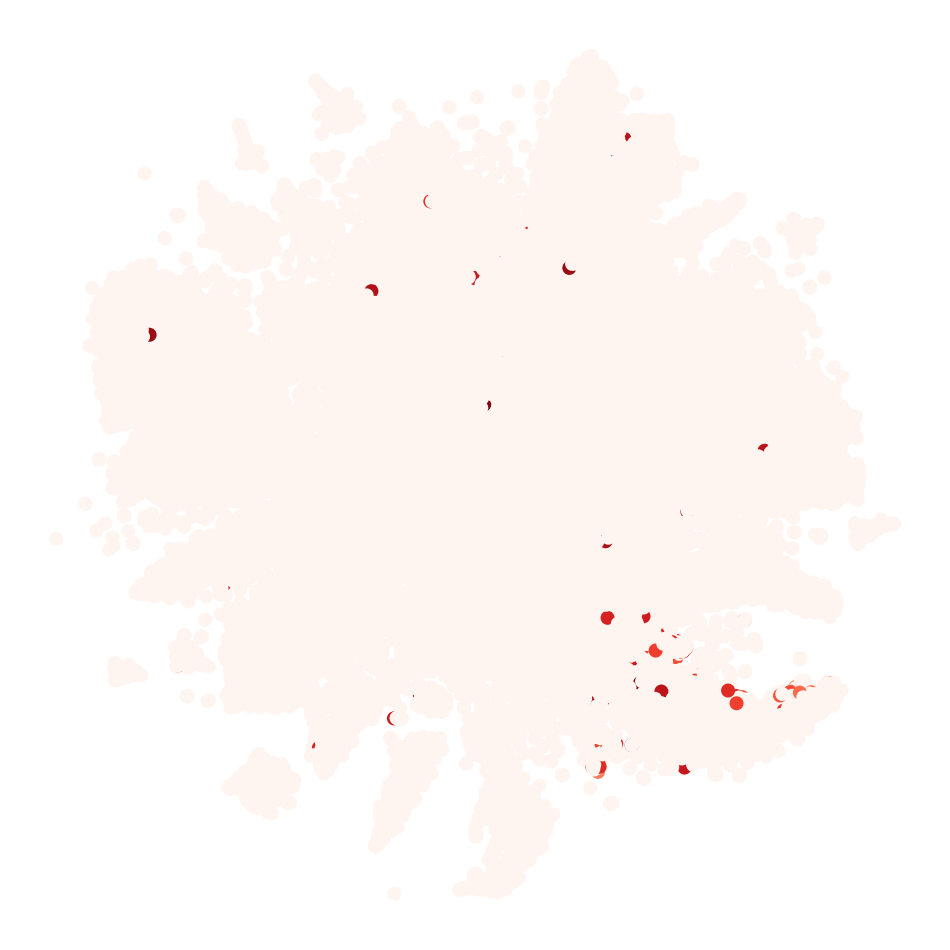

In [72]:
fig, ax = plt.subplots(figsize=(7,7))

x = alldata["tsne_0"]
y = alldata["tsne_1"]

c = nd(alldata["Ace2_log1p"])

ax.scatter(x, y, c = c, cmap='Reds')

ax.set_axis_off()

plt.tight_layout()
plt.show()

# ACE2 expression

In [73]:
mask = nd(alldata["Ace2_log1p"])>0
print("There {} cells with non-zero expression of {}.".format(mask.sum(), "Ace2"))

There 251 cells with non-zero expression of Ace2.


## Per condition and per replicate

In [0]:
mtx = alldata["Ace2_log1p"]
assignments = alldata.SRR.values
unique = np.unique(assignments)

In [0]:
z = np.zeros_like(unique)
df = pd.DataFrame({"n_cells": z, "nnz": z, "log1p":z}, index=unique,)

In [0]:
## First look at non-zero expression

gene_idx = idx

for un, u in enumerate(unique):
    mask = assignments==u
    tmp = mtx[mask]
    arr = nd(tmp)
    
    nnz_mask = arr>0
    
    df.loc[u]["n_cells"] = arr.shape[0]
    df.loc[u]["nnz"] = nnz_mask.sum()
    
    if nnz_mask.sum()>0:
        df.loc[u]["log1p"] = arr[nnz_mask]
        #df.loc[u]['var'] = arr[nnz_mask].var()

In [0]:
age_map = {
    "SRR8426358": 24,
    "SRR8426359": 24,
    "SRR8426362": 24,
    "SRR8426363": 24,
    "SRR8426364": 24,
    "SRR8426369": 24,
    "SRR8426370": 24,
    "SRR8426360": 3,
    "SRR8426361": 3,
    "SRR8426365": 3,
    "SRR8426366": 3,
    "SRR8426367": 3,
    "SRR8426368": 3,
    "SRR8426371": 3,
    "SRR8426372": 3
}

In [0]:
df["age"] = df.index.map(age_map)

In [0]:
df = df.explode("log1p")

In [80]:
df

n_cells nnz    log1p  age
SRR8426358    3354   5  8.21736   24
SRR8426358    3354   5  8.83892   24
SRR8426358    3354   5  5.13583   24
SRR8426358    3354   5   6.3969   24
SRR8426358    3354   5   7.8071   24
...            ...  ..      ...  ...
SRR8426372    3811  19  4.81895    3
SRR8426372    3811  19  7.31339    3
SRR8426372    3811  19  8.44509    3
SRR8426372    3811  19  6.00681    3
SRR8426372    3811  19  7.73601    3

[251 rows x 4 columns]

# Expression of ACE2

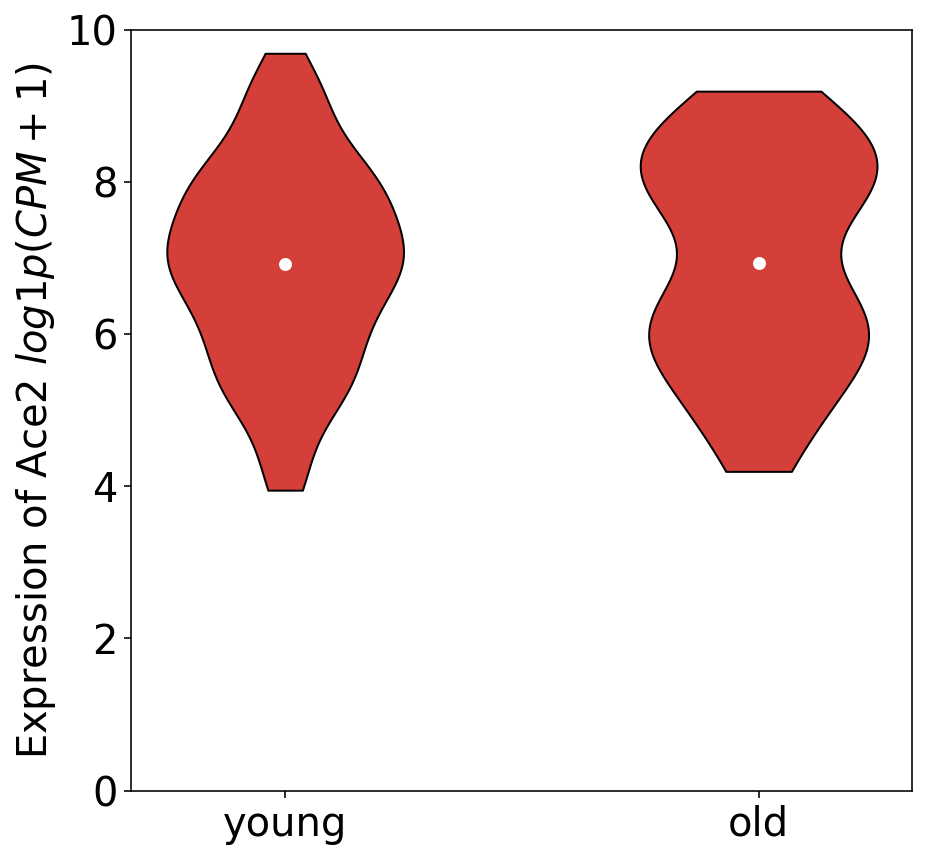

In [81]:
fig, ax = plt.subplots(figsize=(7,7))

labels = ['young', "old"]
lidx = [1, 2]


young = df[df["age"] == 3]["log1p"].values.tolist()
old = df[df["age"] == 24]["log1p"].values.tolist()

x = [young, old]

parts = ax.violinplot(x, showmedians=False, showextrema=False)
for pcidx, pc in enumerate(parts['bodies']):
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

    
mean = [np.mean(i) for i in x]
ax.scatter(lidx, mean, marker='o', color='white', s=30, zorder=3)
ax.set_xticks(lidx)
ax.set_xticklabels(labels)

ax.set_ylim((0, 10))

ax.set_ylabel("Expression of Ace2 $log1p(CPM+1)$")

plt.show()

In [82]:
stats.ttest_ind(young, old)

Ttest_indResult(statistic=-0.08644513291332054, pvalue=0.9311820425979656)

In [0]:
df["nnz_frac"] = df["nnz"]/df["n_cells"]

# Fraction of cells expressing ACE2

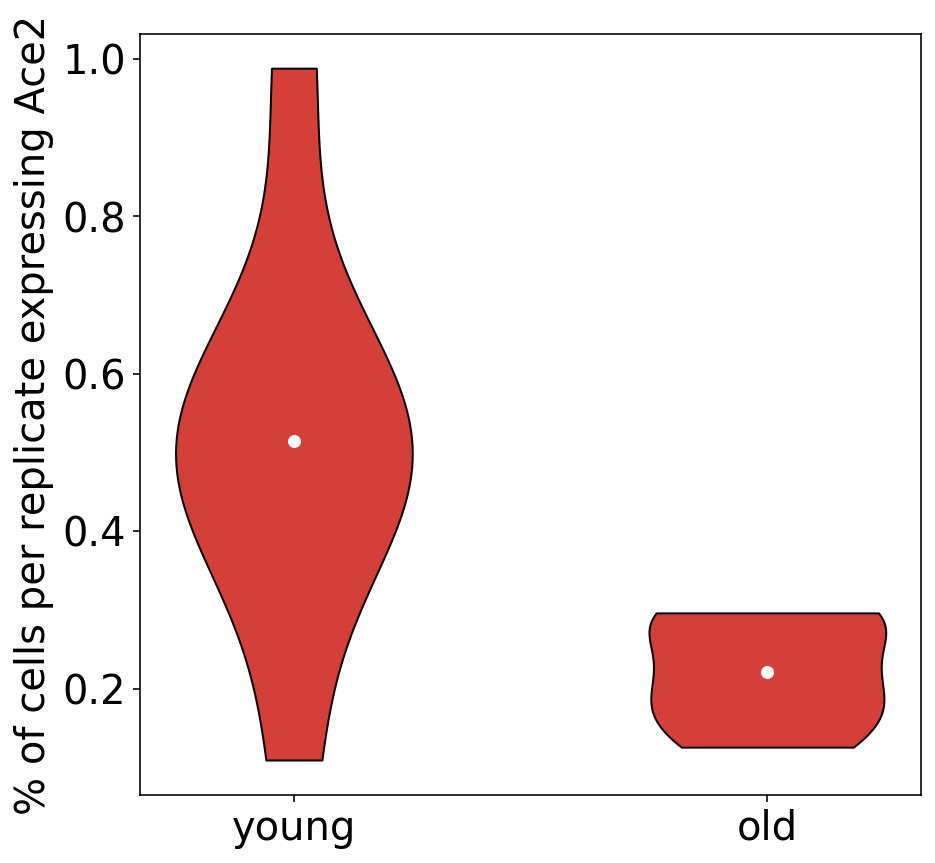

In [84]:
fig, ax = plt.subplots(figsize=(7,7))

labels = ['young', "old"]
lidx = [1, 2]


young = (np.unique(df[df["age"] == 3]["nnz_frac"].values*100)).tolist()
old   = (np.unique(df[df["age"] == 24]["nnz_frac"].values*100)).tolist()

x = [young, old]

parts = ax.violinplot(x, showmedians=False, showextrema=False)
for pcidx, pc in enumerate(parts['bodies']):
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

    
mean = [np.mean(i) for i in x]
ax.scatter(lidx, mean, marker='o', color='white', s=30, zorder=3)
ax.set_xticks(lidx)
ax.set_xticklabels(labels)

ax.set_ylabel("% of cells per replicate expressing Ace2")


plt.show()

#### Exercise

The analyses performed were based on quantifications computed as $log(CPM +1)$, i.e. the raw counts, normalized by read number per cell, and subsequently logged. How do the results change if you omit the logarithm and instead use the CPM matrix directly? Compare the differentially expressed genes for each cluster. Note you can learn how to change the specific anndata layer that is used when performing differential expression from the ScanPy docs: https://icb-scanpy.readthedocs-hosted.com/en/stable/api/scanpy.tl.rank_genes_groups.html.

## Feedback

Please report any issues with this notebook or submit pull requests for improvements at the project [Github repository](https://github.com/pachterlab/BBB/blob/master/notebooks/lung_atlas/mouse_lung_dropseq_SRR8426358_python.ipynb).

## Acknowledgments

This notebook and the associated workshop are the result of a lot of work, and many ideas from numerous people. The notebook is modified from [several single-cell RNA-seq notebooks](https://www.kallistobus.tools/tutorials) developed previously by Sina Booeshaghi and Lambda. The workshop was inspired by a workshop organized with Fan Gao and Ingileif Hallgrímsdóttir, in which participants were guided through Colab notebooks by Sina Booeshaghi and Lambda. 

In [85]:
# Running time of the notebook
print("{:.2f} minutes".format((time.time()-start_time)/60))

32.11 minutes
